In [71]:
# Importing the required libraries
import pandas as pd
import collections
import numpy as np
from sklearn import set_config
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD

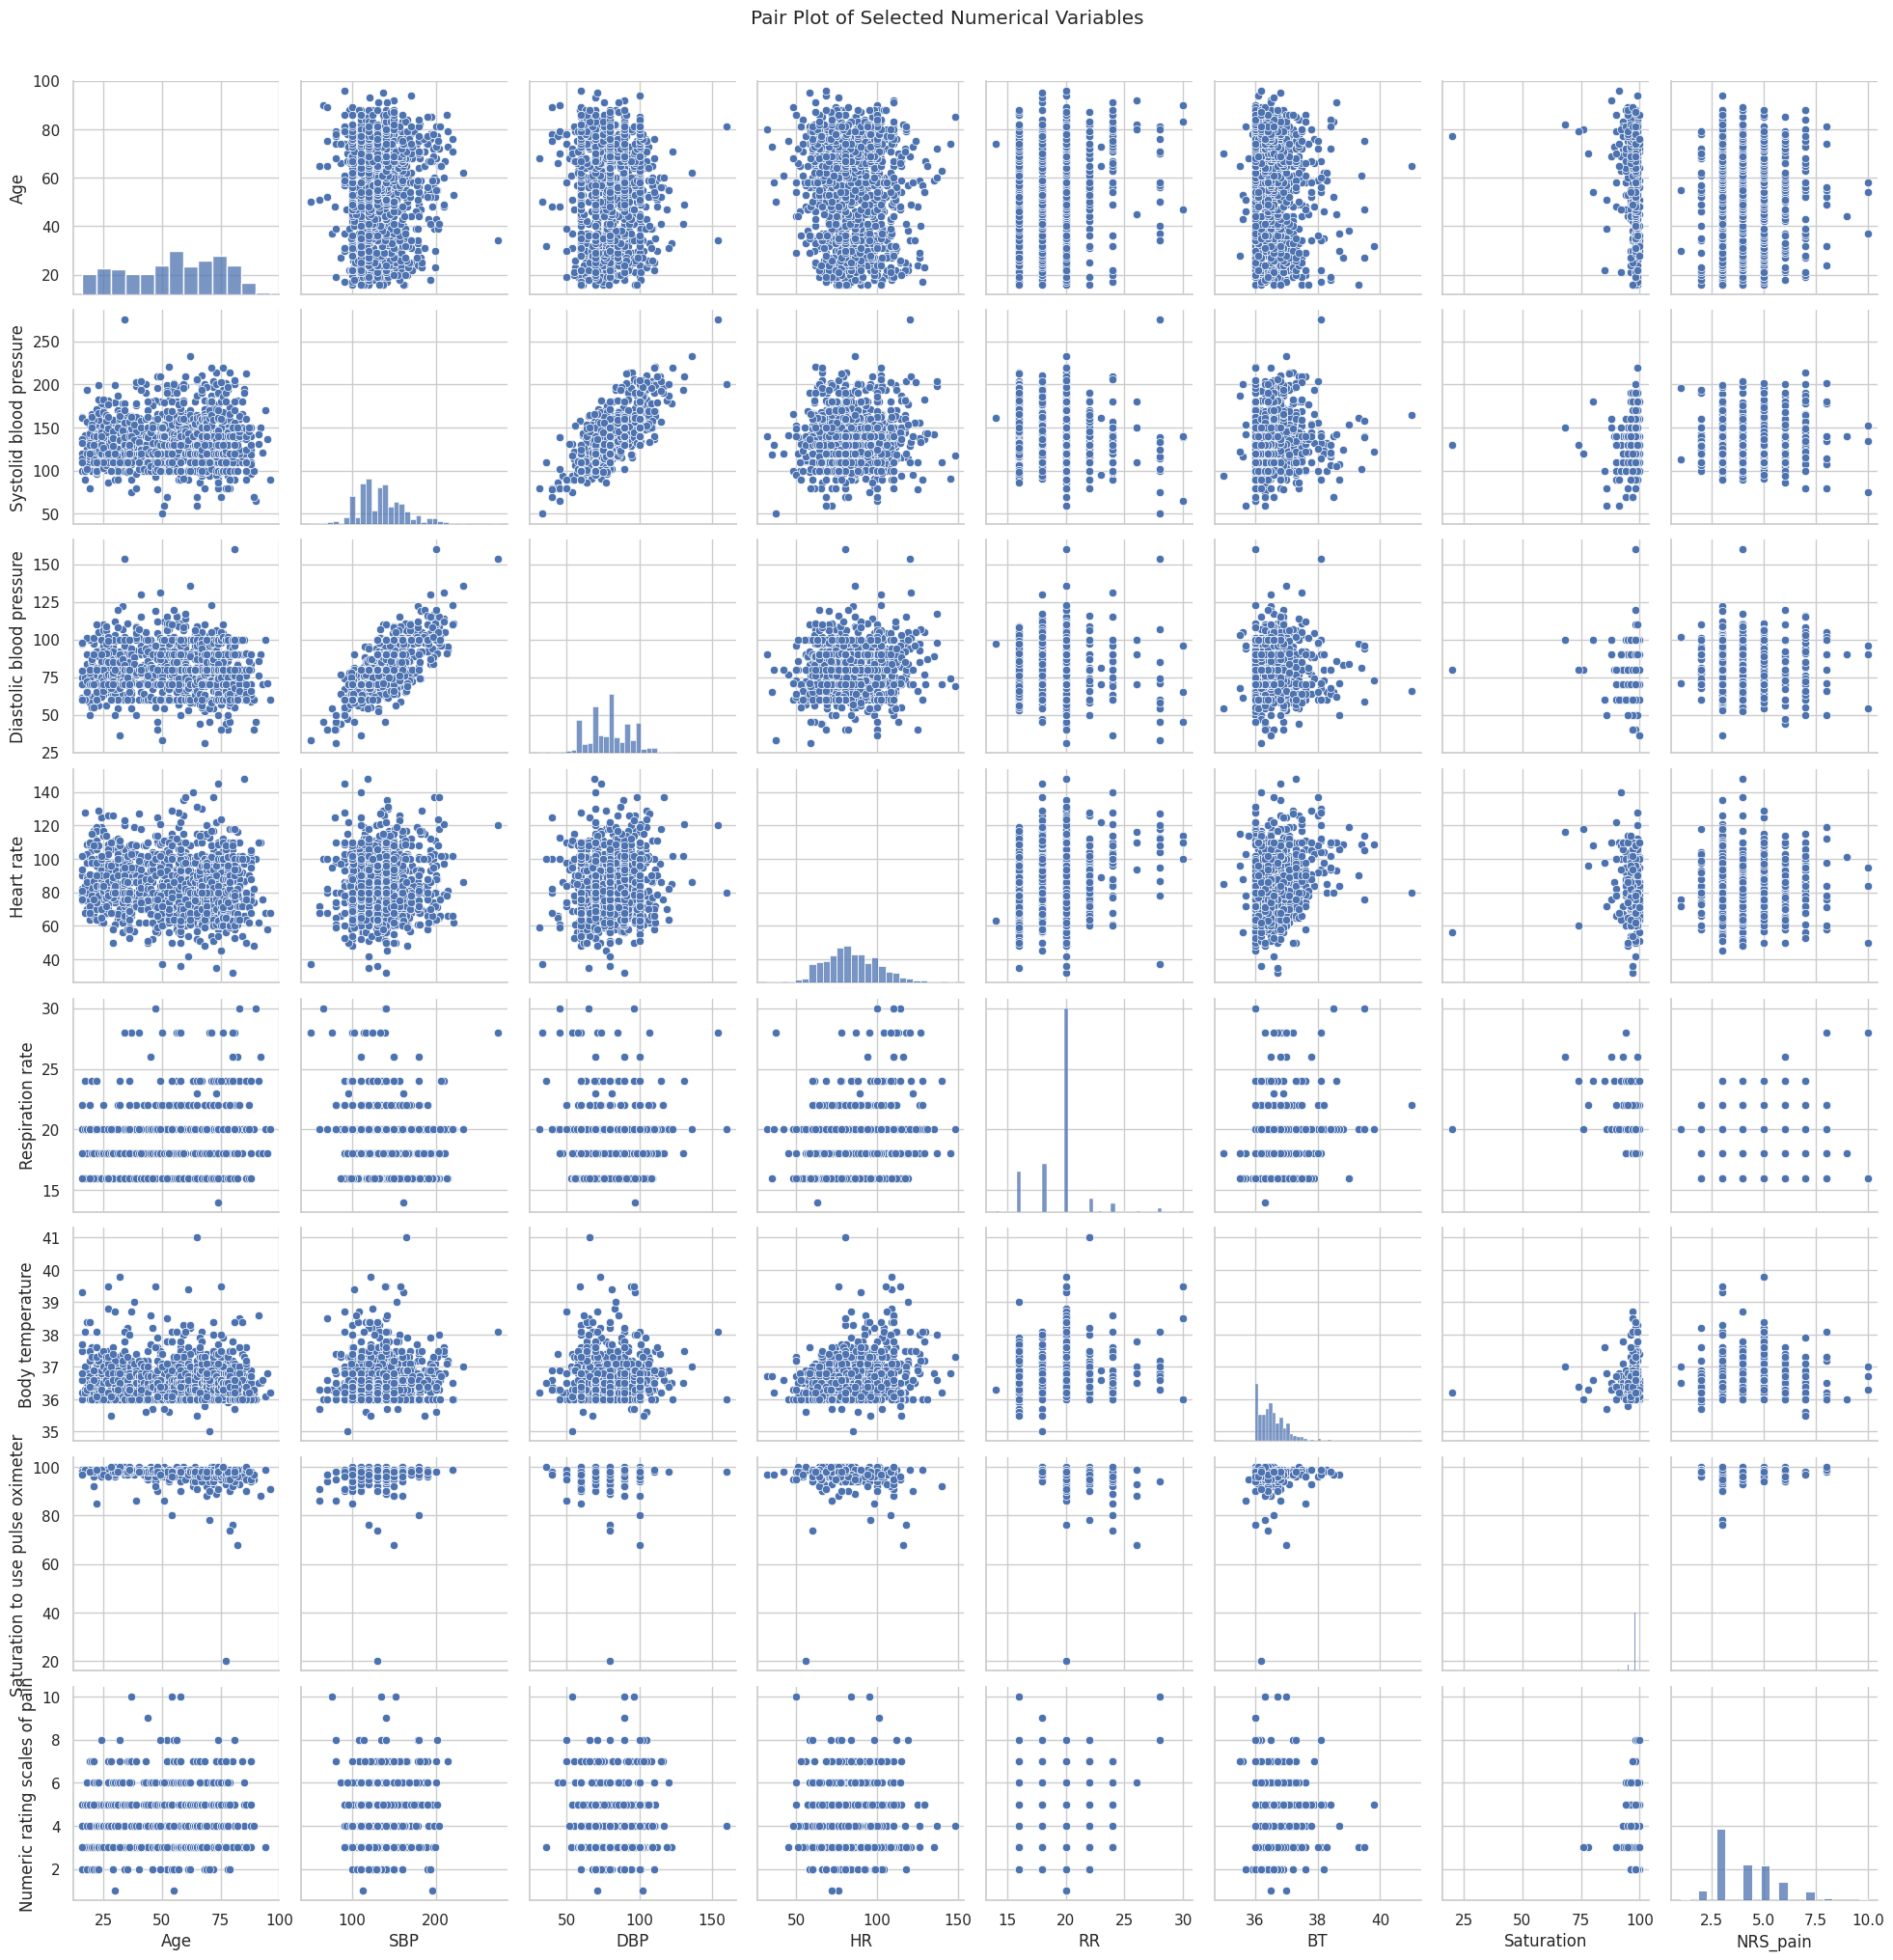

In [72]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your data is stored in a DataFrame named 'df'
df = pd.read_csv("501_project_dataset.tsv", sep='\t')

# Original and custom column names mapping
column_mapping = {
    'Age': 'Age',
    'SBP': 'Systolid blood pressure',
    'DBP': 'Diastolic blood pressure',
    'HR': 'Heart rate',
    'RR': 'Respiration rate',
    'BT': 'Body temperature',
    'Saturation': 'Saturation to use pulse oximeter',
    'NRS_pain': 'Numeric rating scales of pain'
}

# Selecting a subset of numerical columns for analysis using custom names
numerical_columns_subset = list(column_mapping.values())

# Scatter plots
pair_plot = sns.pairplot(df[list(column_mapping.keys())])

# Customizing y-axis labels with custom names
for i, col in enumerate(numerical_columns_subset):
    pair_plot.axes[i, 0].set_ylabel(col)

# Adding a title to the pair plot
plt.suptitle('Pair Plot of Selected Numerical Variables', y=1.02)

# Display the plot
plt.show()

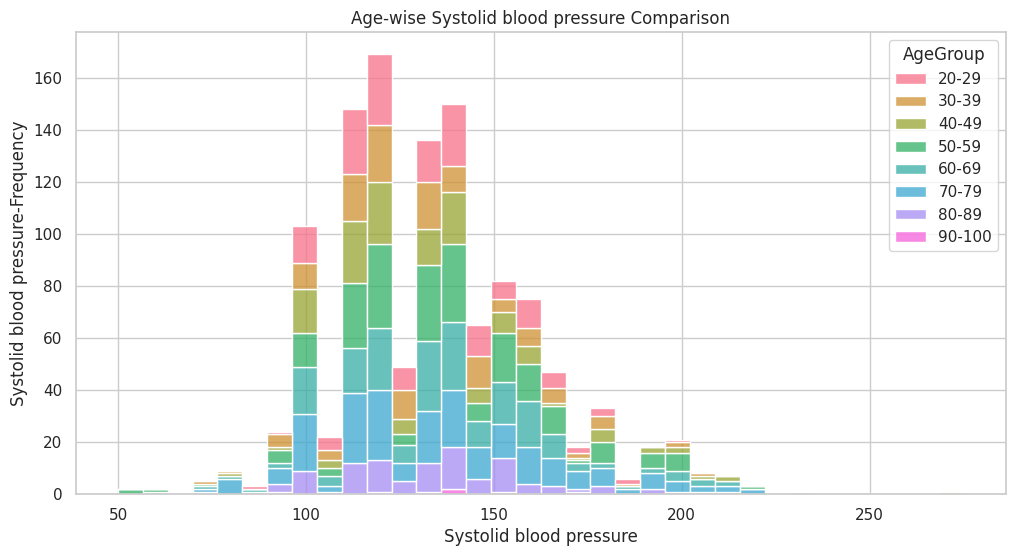

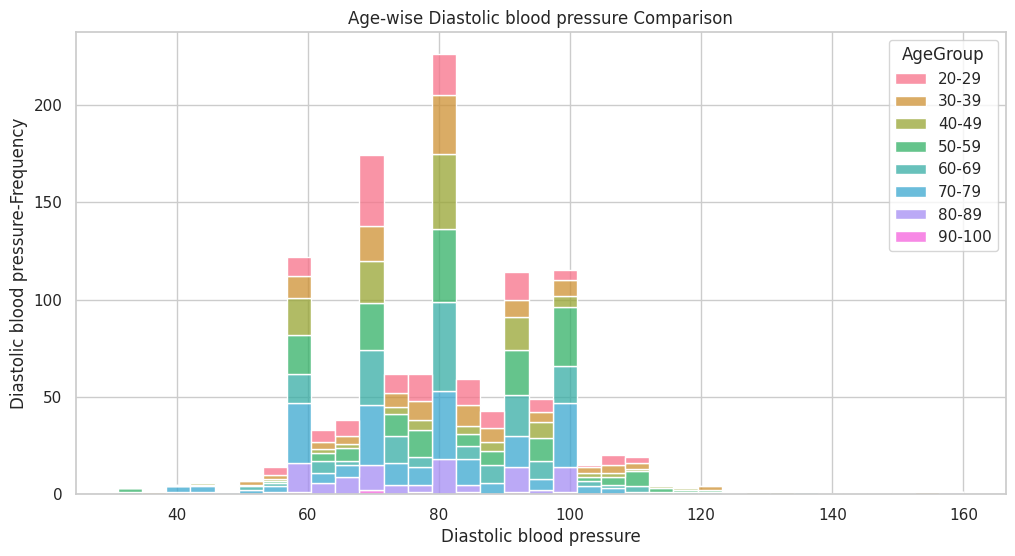

In [73]:
# Set the age groups
bins = [20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90-100']

# Create a new column 'AgeGroup' based on age bins
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Define a custom color palette
colors = sns.color_palette('husl', n_colors=len(labels))

# Histogram for Age-wise SBP comparison
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='SBP', hue='AgeGroup', multiple='stack', palette=colors)
plt.title('Age-wise Systolid blood pressure Comparison')
plt.xlabel('Systolid blood pressure')
plt.ylabel('Systolid blood pressure-Frequency')
plt.show()

# Histogram for Age-wise DBP comparison
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='DBP', hue='AgeGroup', multiple='stack', palette=colors)
plt.title('Age-wise Diastolic blood pressure Comparison')
plt.xlabel('Diastolic blood pressure')
plt.ylabel('Diastolic blood pressure-Frequency')
plt.show()

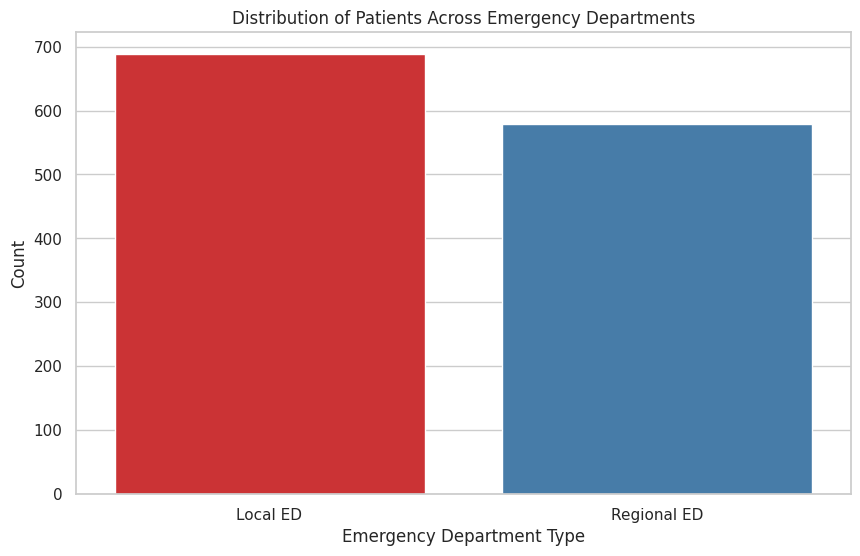

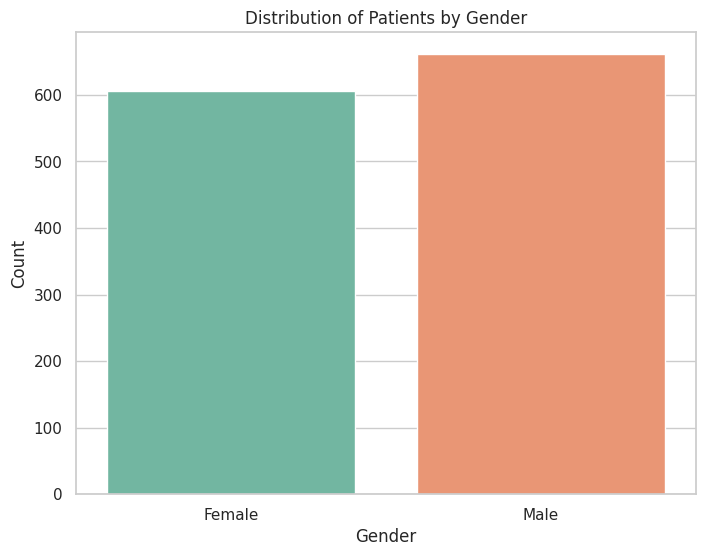

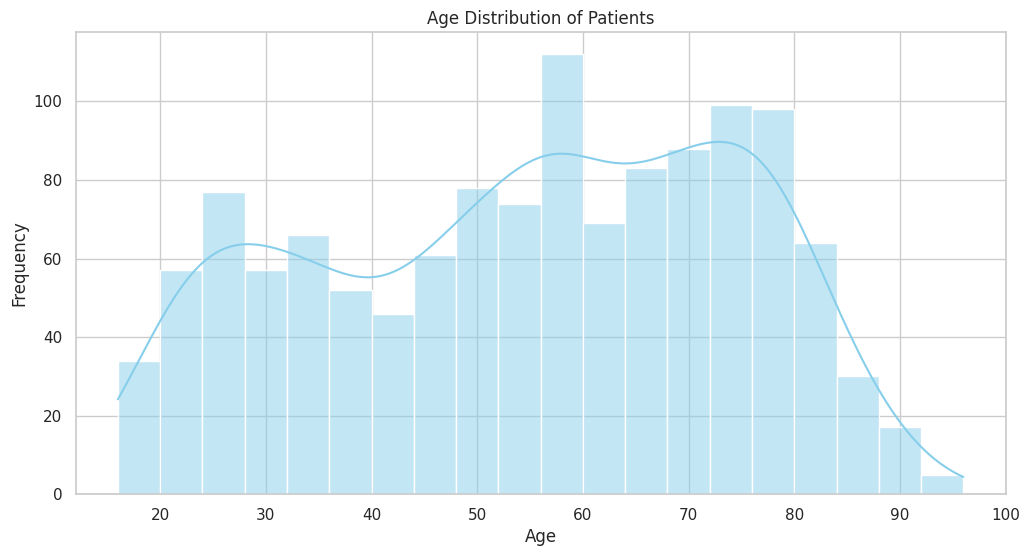

In [74]:
# Demographic Analysis: Compare the distribution of patients across different types of Emergency Departments
plt.figure(figsize=(10, 6))
sns.countplot(x='Group', data=df, palette="Set1")
plt.title('Distribution of Patients Across Emergency Departments')
plt.xlabel('Emergency Department Type')
plt.ylabel('Count')
plt.xticks([0, 1], ['Local ED', 'Regional ED'])
plt.show()

# Demographic Analysis: Analyze the distribution of patients by gender
plt.figure(figsize=(8, 6))
sns.countplot(x='Sex', data=df, palette="Set2")
plt.title('Distribution of Patients by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks([0, 1], ['Female', 'Male'])
plt.show()

# Demographic Analysis: Explore the age distribution of patients
plt.figure(figsize=(12, 6))
sns.histplot(df['Age'], bins=20, kde=True, color='skyblue')
plt.title('Age Distribution of Patients')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

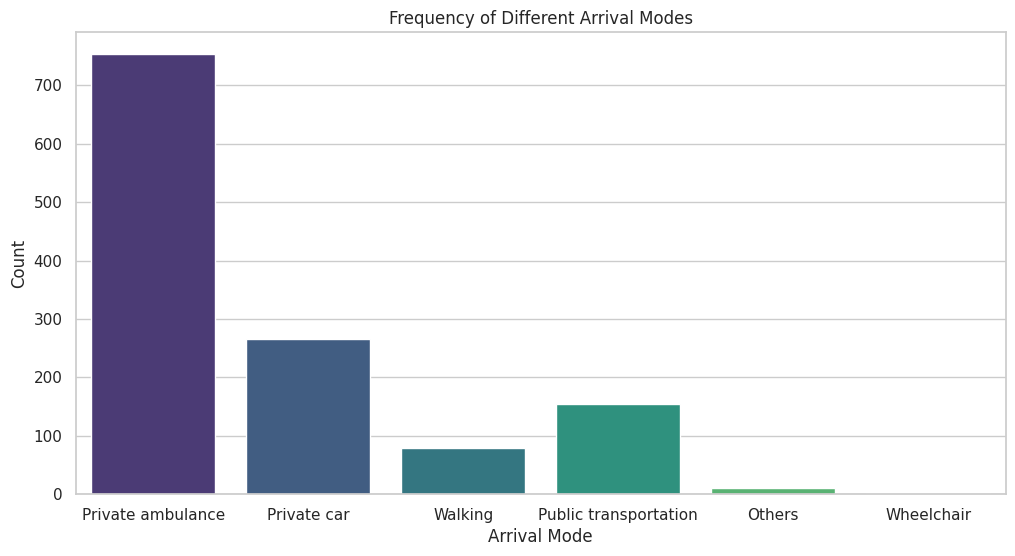

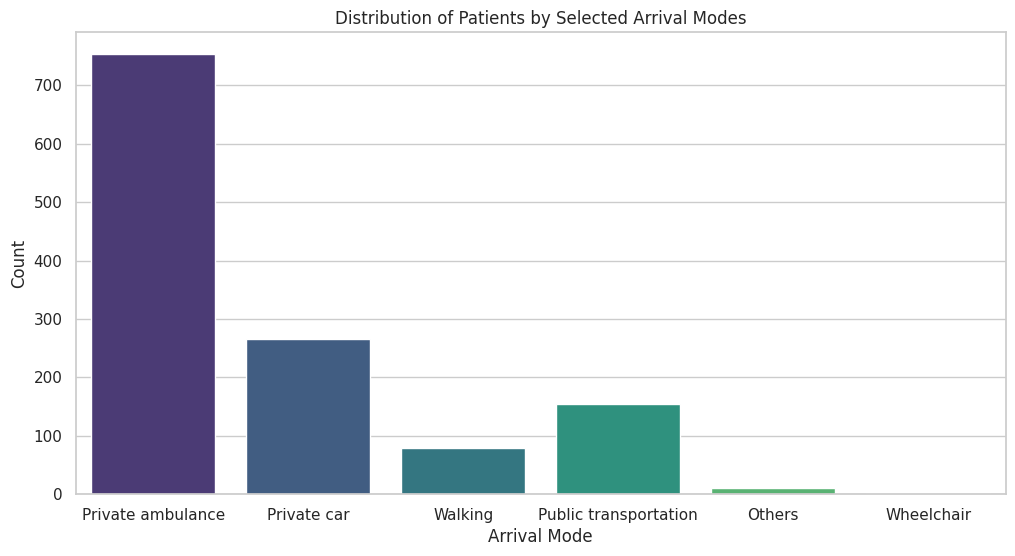

In [75]:
df = pd.read_csv("501_project_dataset.tsv", sep='\t')

# Mapping of arrival mode codes to labels
arrival_mode_labels = {
    1: 'Walking',
    2: 'Private car',
    3: 'Private ambulance',
    4: 'Public transportation',
    5: 'Wheelchair',
    6: 'Others'
}

# Replace arrival mode codes with labels
df['Arrival mode'] = df['Arrival mode'].map(arrival_mode_labels)

# Set the style for seaborn
sns.set(style="whitegrid")

# Arrival Mode Analysis: Compare the frequency of different arrival modes
plt.figure(figsize=(12, 6))
sns.countplot(x='Arrival mode', data=df, palette='viridis')
plt.title('Frequency of Different Arrival Modes')
plt.xlabel('Arrival Mode')
plt.ylabel('Count')
plt.show()

# Arrival Mode Analysis: Analyze the distribution of patients by walking, private car, ambulance, etc.
selected_arrival_modes = ['Walking', 'Private car', 'Private ambulance', 'Public transportation', 'Wheelchair', 'Others']
filtered_df = df[df['Arrival mode'].isin(selected_arrival_modes)]

plt.figure(figsize=(12, 6))
sns.countplot(x='Arrival mode', data=filtered_df, palette='viridis')
plt.title('Distribution of Patients by Selected Arrival Modes')
plt.xlabel('Arrival Mode')
plt.ylabel('Count')
plt.show()

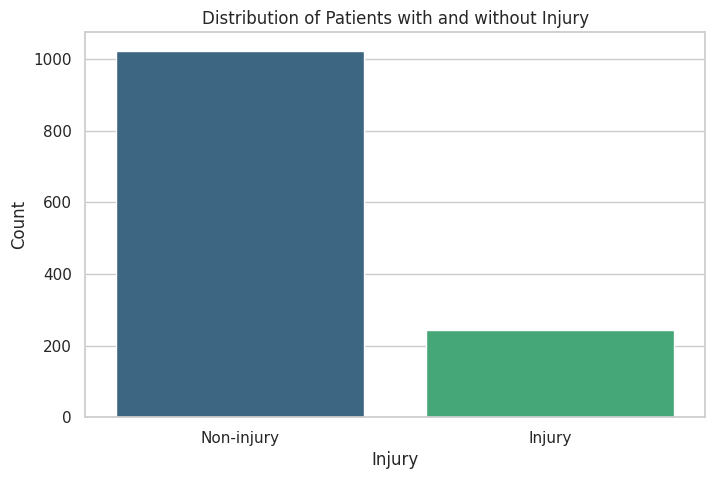

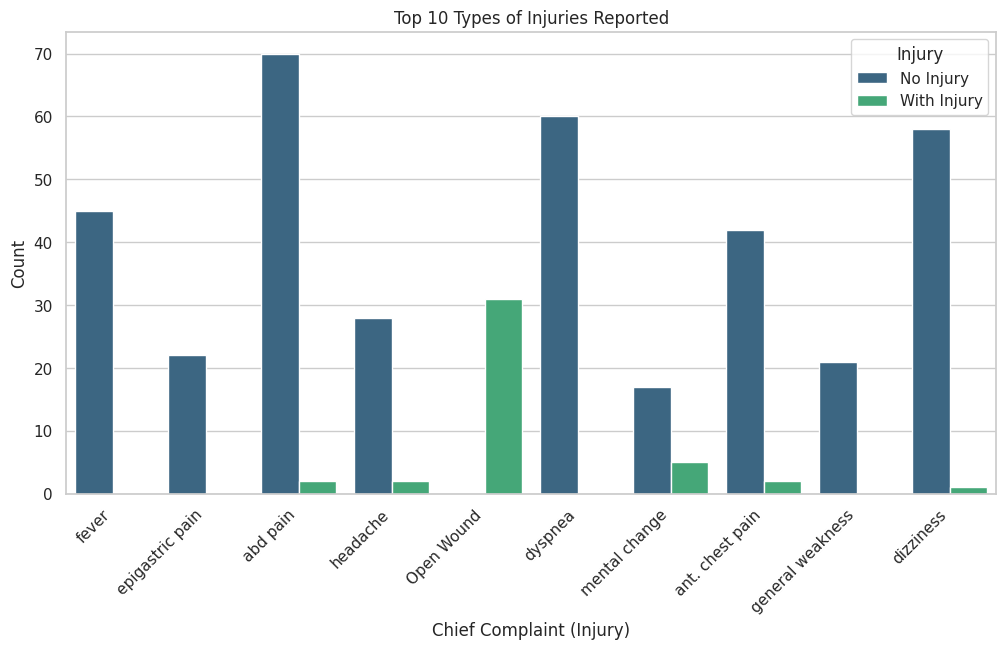

In [76]:
# Injury Analysis: Compare the distribution of patients with and without injury
plt.figure(figsize=(8, 5))
ax = sns.countplot(x='Injury', data=df, palette='viridis')

#  x-axis labels
injury_labels = {
    1: 'Non-injury',
    2: 'Injury'
}
ax.set_xticklabels([f"{value}" for key, value in injury_labels.items()])

plt.title('Distribution of Patients with and without Injury')
plt.xlabel('Injury')
plt.ylabel('Count')
plt.show()

# Injury Analysis: Explore the top 10 types of injuries reported
top_injuries = df['Cheif_Complain_Translated'].value_counts().nlargest(10).index

plt.figure(figsize=(12, 6))
sns.countplot(x='Cheif_Complain_Translated', hue='Injury', data=df[df['Cheif_Complain_Translated'].isin(top_injuries)], palette='viridis')
plt.title('Top 10 Types of Injuries Reported')
plt.xlabel('Chief Complaint (Injury)')
plt.ylabel('Count')
plt.legend(title='Injury', loc='upper right', labels=['No Injury', 'With Injury'])
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()

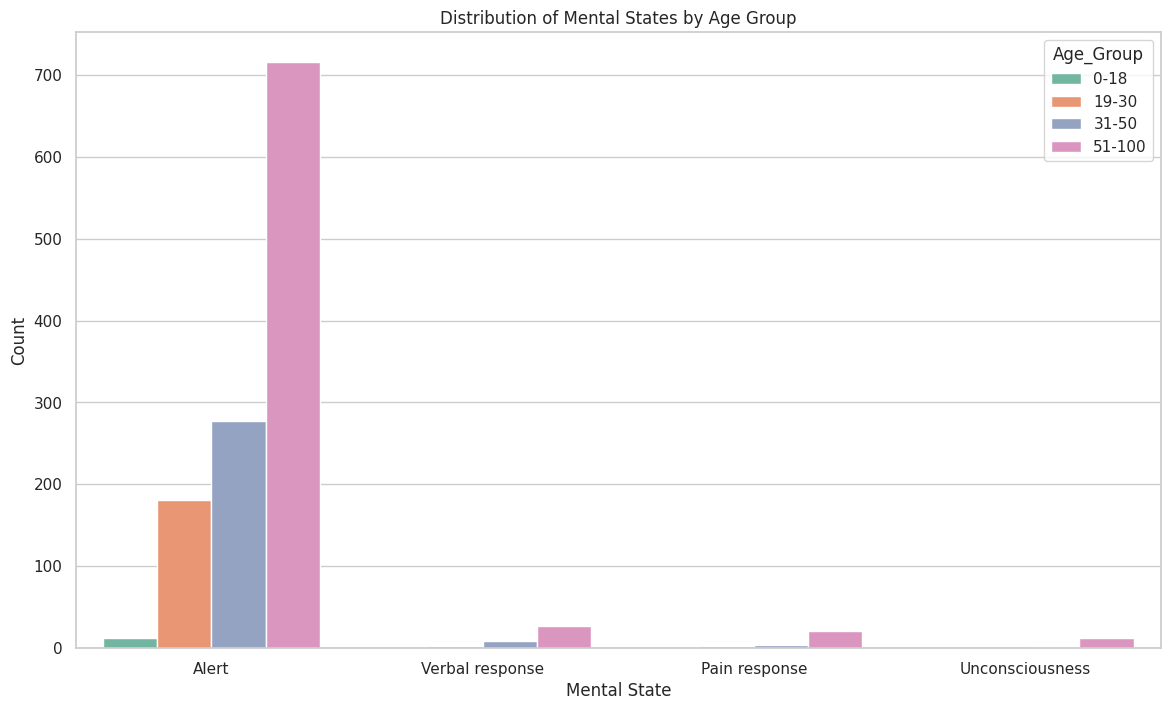

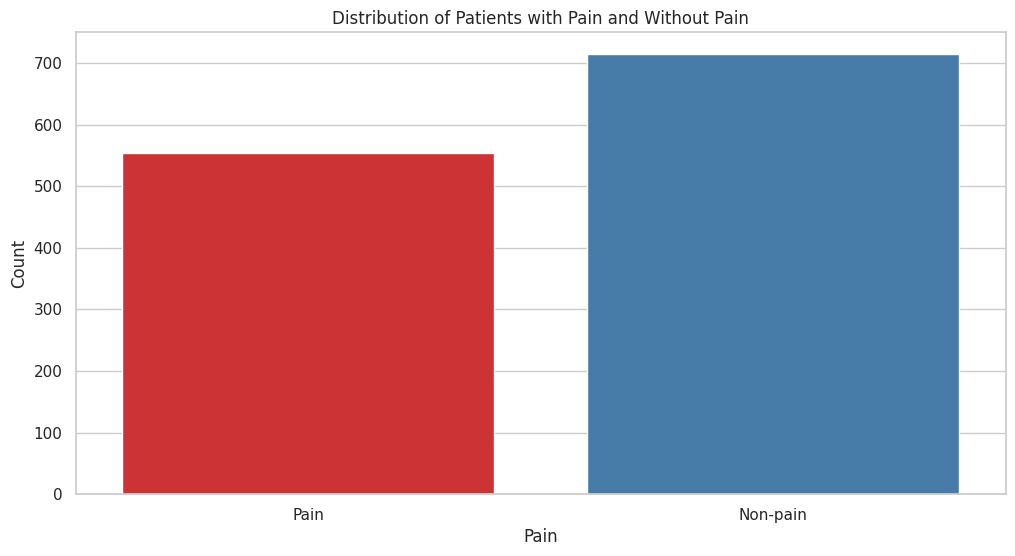

In [77]:
# Binning the 'Age' column into different age groups
bins = [0, 18, 30, 50, 100]
labels = ['0-18', '19-30', '31-50', '51-100']
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Mental State Analysis: Analyze the distribution of mental states by age group
plt.figure(figsize=(14, 8))
ax = sns.countplot(x='Mental', hue='Age_Group', data=df, palette='Set2')

# x-axis labels for mental states
mental_state_labels = {
    1: 'Alert',
    2: 'Verbal response',
    3: 'Pain response',
    4: 'Unconsciousness'
}
ax.set_xticklabels([f"{value}" for key, value in mental_state_labels.items()])

# Setting the title and axis labels for the plot
plt.title('Distribution of Mental States by Age Group')
plt.xlabel('Mental State')
plt.ylabel('Count')
plt.show()

# Distribution of Pain among Patients
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='Pain', data=df, palette='Set1')

# x-axis labels for pain categories
pain_labels = {
    0: 'Pain',
    1: 'Non-pain'
}
ax.set_xticklabels([f"{value}" for key, value in pain_labels.items()])

# Setting the title and axis labels for the plot
plt.title('Distribution of Patients with Pain and Without Pain')
plt.xlabel('Pain')
plt.ylabel('Count')
plt.show()

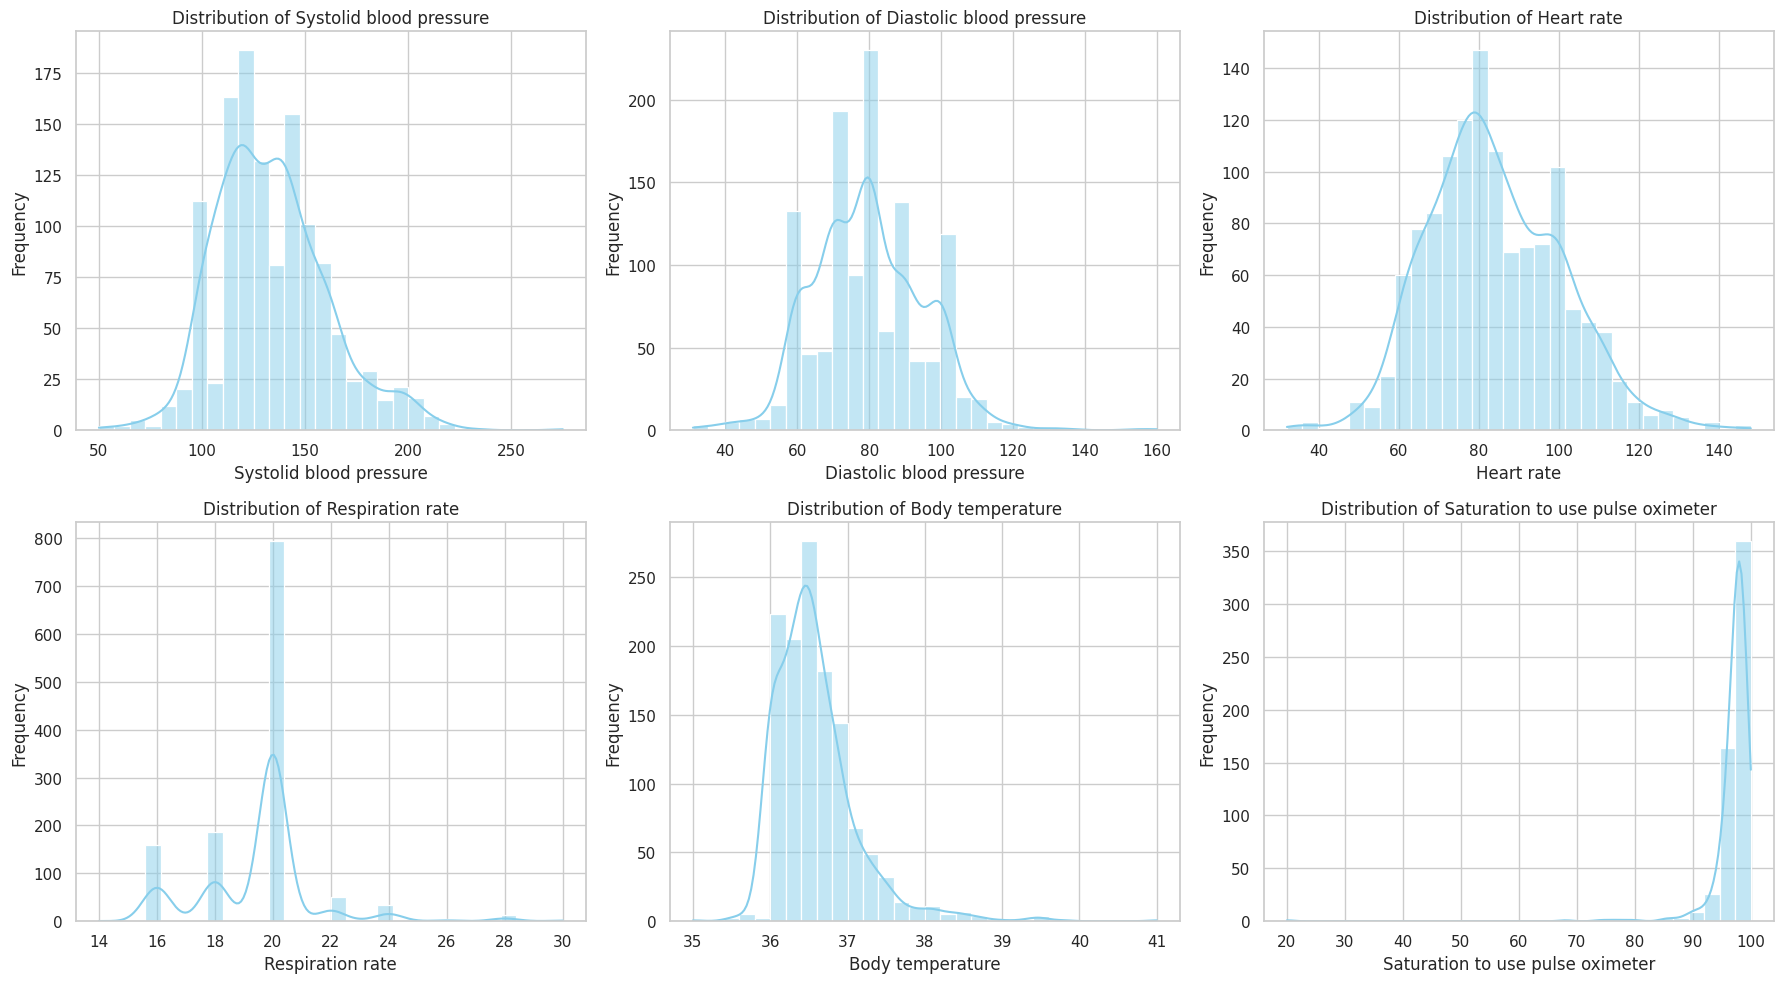

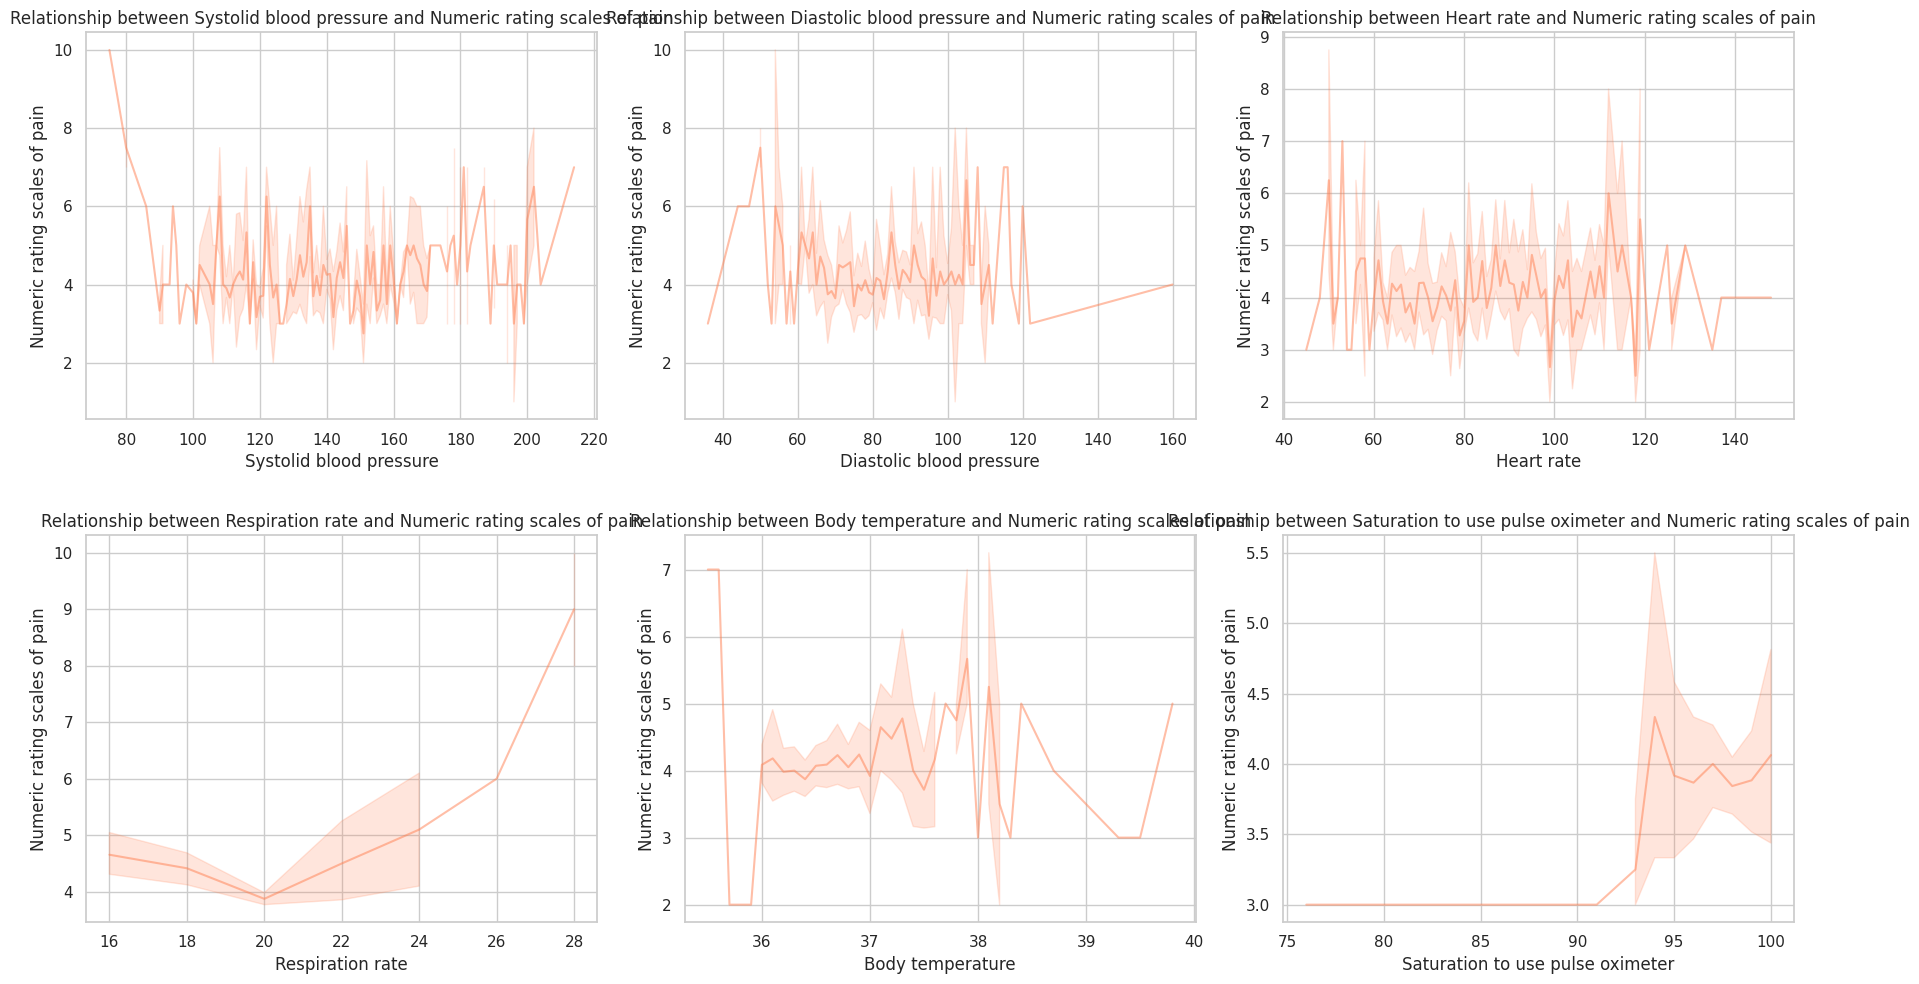

In [78]:
vital_signs = ['SBP', 'DBP', 'HR', 'RR', 'BT', 'Saturation']
vital_signs_labels = ['Systolid blood pressure', 'Diastolic blood pressure', 'Heart rate', 'Respiration rate', 'Body temperature', 'Saturation to use pulse oximeter']

plt.figure(figsize=(18, 10))
for i, (vital_sign, label) in enumerate(zip(vital_signs, vital_signs_labels), 1):
    plt.subplot(2, 3, i)
    sns.histplot(data=df, x=vital_sign, kde=True, color='skyblue', bins=30)
    plt.title(f'Distribution of {label}')
    plt.xlabel(label)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Vital Signs Analysis: Explore the relationship between pain (NRS_pain) and vital signs
plt.figure(figsize=(18, 10))
for i, (vital_sign, label) in enumerate(zip(vital_signs, vital_signs_labels), 1):
    plt.subplot(2, 3, i)
    sns.lineplot(x=vital_sign, y='NRS_pain', data=df, color='coral', alpha=0.5)
    plt.title(f'Relationship between {label} and Numeric rating scales of pain')
    plt.xlabel(label)
    plt.ylabel('Numeric rating scales of pain')

plt.tight_layout(h_pad=2.5)  # Increase the height space between subplots
plt.show()

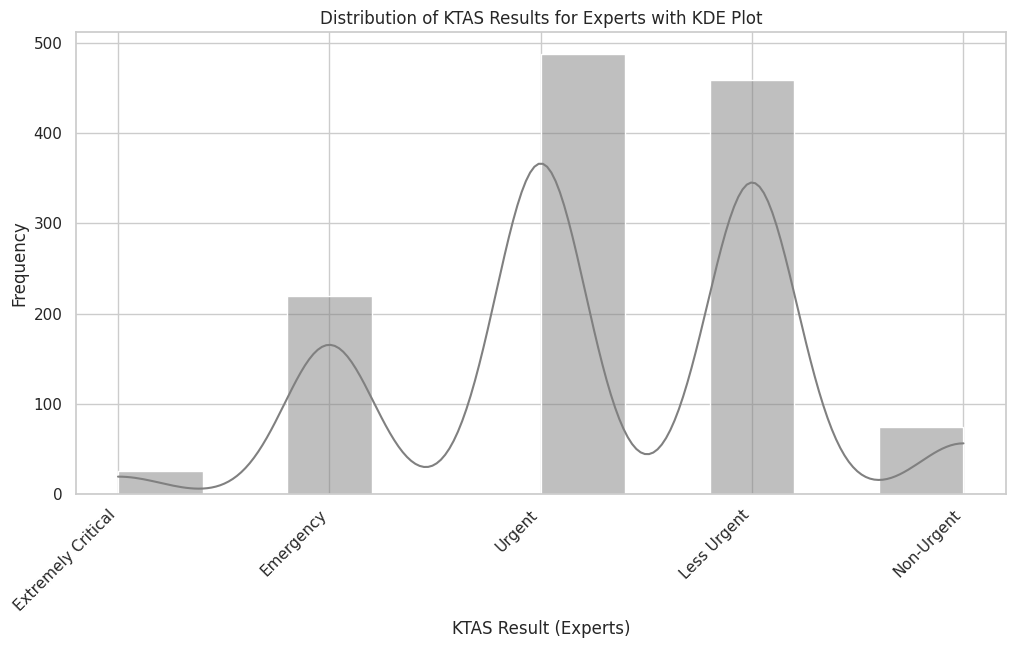

In [79]:
# Mapping of KTAS codes to labels
ktas_labels = {
    1: 'Extremely Critical',
    2: 'Emergency',
    3: 'Urgent',
    4: 'Less Urgent',
    5: 'Non-Urgent'
}

# KTAS Analysis: Analyze the distribution of KTAS results for experts with KDE plot
plt.figure(figsize=(12, 6))
ax = sns.histplot(data=df, x='KTAS_expert', kde=True, color='gray', bins=10)

plt.title('Distribution of KTAS Results for Experts with KDE Plot')
plt.xlabel('KTAS Result (Experts)')
plt.ylabel('Frequency')

# Setting custom x-axis tick labels with rotation
ax.set_xticks(range(1, 6))
ax.set_xticklabels([ktas_labels[val] for val in range(1, 6)], rotation=45, ha='right')
plt.show()

In [80]:
# EDA

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming data is in a CSV file named 'your_data.csv'
file_path = '501_project_dataset.tsv'
df = pd.read_csv(file_path, sep="\t")


# Display the first few rows of the DataFrame
print("First few rows of the DataFrame:")
df.head()

First few rows of the DataFrame:


,Unnamed: 0,Group,Sex,Age,Patients number per hour,Arrival mode,Injury,Cheif_Complain_Translated,Mental,Pain,NRS_pain,SBP,DBP,HR,RR,BT,Saturation,Diagnosis in ED,KTAS_expert
0,0,2,2,71,3,3,2,right ocular pain,1,1,2.0,160.0,100.0,84.0,18.0,36.6,100.0,Corneal abrasion,4
1,1,1,1,56,12,3,2,right forearm burn,1,1,2.0,137.0,75.0,60.0,20.0,36.5,NaN,"Burn of hand, firts degree dorsum",5
2,2,2,1,68,8,2,2,"arm pain, Lt",1,1,2.0,130.0,80.0,102.0,20.0,36.6,98.0,"Fracture of surgical neck of humerus, closed",5
3,3,1,2,71,8,1,1,ascites tapping,1,1,3.0,139.0,94.0,88.0,20.0,36.5,NaN,Alcoholic liver cirrhosis with ascites,5
4,4,1,2,58,4,3,1,"Distension, Abd",1,1,3.0,91.0,67.0,93.0,18.0,36.5,NaN,Ascites,5


In [81]:
# Summary of the DataFrame, including data types and non-null counts
print("\nSummary of the DataFrame:")
df.info()

# Basic statistics of numerical columns
print("\nBasic statistics of numerical columns:")
df.describe()


Summary of the DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1267 entries, 0 to 1266
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 1267 non-null   int64  
 1   Group                      1267 non-null   int64  
 2   Sex                        1267 non-null   int64  
 3   Age                        1267 non-null   int64  
 4   Patients number per hour   1267 non-null   int64  
 5   Arrival mode               1267 non-null   int64  
 6   Injury                     1267 non-null   int64  
 7   Cheif_Complain_Translated  1267 non-null   object 
 8   Mental                     1267 non-null   int64  
 9   Pain                       1267 non-null   int64  
 10  NRS_pain                   711 non-null    float64
 11  SBP                        1242 non-null   float64
 12  DBP                        1238 non-null   float64
 13  HR                   

,Unnamed: 0,Group,Sex,Age,Patients number per hour,Arrival mode,Injury,Mental,Pain,NRS_pain,SBP,DBP,HR,RR,BT,Saturation,KTAS_expert
count,1267.000000,1267.000000,1267.000000,1267.000000,1267.000000,1267.000000,1267.000000,1267.000000,1267.000000,711.000000,1242.000000,1238.000000,1247.000000,1245.000000,1249.000000,570.000000,1267.000000
mean,633.000000,1.456985,1.521705,54.423836,7.519337,2.820837,1.192581,1.105762,0.563536,4.104079,133.648953,79.780291,83.963111,19.506827,36.580624,97.024561,3.265983
std,365.895705,0.498343,0.499726,19.725033,3.160563,0.807904,0.394482,0.447768,0.496143,1.419332,27.275639,15.154292,16.644096,2.016649,0.545708,4.350556,0.885803
min,0.000000,1.000000,1.000000,16.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,50.000000,31.000000,32.000000,14.000000,35.000000,20.000000,1.000000
25%,316.500000,1.000000,1.000000,37.000000,5.000000,2.000000,1.000000,1.000000,0.000000,3.000000,114.000000,70.000000,72.000000,18.000000,36.200000,97.000000,3.000000
50%,633.000000,1.000000,2.000000,57.000000,7.000000,3.000000,1.000000,1.000000,1.000000,4.000000,130.000000,80.000000,82.000000,20.000000,36.500000,98.000000,3.000000
75%,949.500000,2.000000,2.000000,71.000000,10.000000,3.000000,1.000000,1.000000,1.000000,5.000000,150.000000,90.000000,96.000000,20.000000,36.800000,98.000000,4.000000
max,1266.000000,2.000000,2.000000,96.000000,17.000000,7.000000,2.000000,4.000000,1.000000,10.000000,275.000000,160.000000,148.000000,30.000000,41.000000,100.000000,5.000000


count: This row shows the number of non-missing values for each column. For example, in the "KTAS_expert" column, there are 1267 non-missing values.

mean: This row represents the mean (average) value for each column. For instance, the mean age in our dataset is approximately 54.42 years.

std: The standard deviation is a measure of the amount of variation or dispersion in a set of values. A higher standard deviation indicates more spread-out values. In this dataset, the standard deviation for age is approximately 19.73.

min: The minimum value in each column. For example, the minimum age in our dataset is 16 years.

25%: This represents the first quartile (Q1) or the 25th percentile. It indicates the value below which 25% of the data falls. For example, 25% of the ages in this dataset are below 37 years.

50%: This is the median or the second quartile (Q2) or the 50th percentile. It represents the middle value of the dataset. In this dataset, the median age is approximately 57 years.

75%: This is the third quartile (Q3) or the 75th percentile. It indicates the value below which 75% of the data falls. For example, 75% of the ages in this dataset are below 71 years.

max: The maximum value in each column. For instance, the maximum age in this dataset is 96 years.

In [82]:
# Skewness Analysis: Select numeric columns excluding 'Unnamed: 0'
numeric_columns = df.drop(columns=['Unnamed: 0']).select_dtypes(include=['float64', 'int64']).columns

# Calculate skewness for the selected numeric columns
skewness = df[numeric_columns].skew()

# Print a header for the skewness values
print("Skewness:\n")

# Display the calculated skewness values
skewness

Skewness:



Group                        0.172905
Sex                         -0.087004
Age                         -0.205013
Patients number per hour     0.332466
Arrival mode                 0.183681
Injury                       1.561059
Mental                       4.687887
Pain                        -0.256524
NRS_pain                     0.915158
SBP                          0.624908
DBP                          0.345240
HR                           0.367710
RR                           0.874171
BT                           2.079014
Saturation                 -11.221977
KTAS_expert                 -0.211140
dtype: float64

**Skewness it indicates whether the data points in a distribution are concentrated more on one side than the other.**

Group:Skewness of the 'Group' column. A value around 0 indicates approximately symmetric distribution.

Sex:Skewness of the 'Sex' column. A value around 0 indicates approximately symmetric distribution.

Age: Skewness of the 'Age' column. A negative value indicates a longer left tail, meaning the distribution is skewed to the younger age group.

Patients number per hour: Skewness of the 'Patients number per hour' column. A positive value indicates a longer right tail, meaning the distribution is skewed to higher patient numbers per hour.

Arrival mode: Skewness of the 'Arrival mode' column. A value around 0 indicates approximately symmetric distribution.

Injury: Skewness of the 'Injury' column. A positive value indicates a longer right tail, meaning the distribution is skewed towards more instances of injury.

Mental: Skewness of the 'Mental' column. A positive value indicates a longer right tail, meaning the distribution is skewed towards higher mental state values.

Pain: Skewness of the 'Pain' column. A negative value indicates a longer left tail, meaning the distribution is skewed towards lower pain values.

NRS_pain: Skewness of the 'NRS_pain' column. A positive value indicates a longer right tail, meaning the distribution is skewed towards higher Numeric Rating Scale for pain values.

SBP: Skewness of the 'SBP' (Systolic Blood Pressure) column. A positive value indicates a longer right tail, meaning the distribution is skewed towards higher systolic blood pressure.

DBP: Skewness of the 'DBP' (Diastolic Blood Pressure) column. A positive value indicates a longer right tail, meaning the distribution is skewed towards higher diastolic blood pressure.

HR: Skewness of the 'HR' (Heart Rate) column. A positive value indicates a longer right tail, meaning the distribution is skewed towards higher heart rates.

RR: Skewness of the 'RR' (Respiration Rate) column. A positive value indicates a longer right tail, meaning the distribution is skewed towards higher respiration rates.

BT: Skewness of the 'BT' (Body Temperature) column. A positive value indicates a longer right tail, meaning the distribution is skewed towards higher body temperatures.

Saturation: Skewness of the 'Saturation' column. A highly negative value indicates a longer left tail, meaning the distribution is strongly skewed towards lower saturation values. It might be worth investigating the extreme skewness in this variable.

KTAS_expert: Skewness of the 'KTAS_expert' column. A negative value indicates a longer left tail, meaning the distribution is skewed towards lower KTAS expert ratings.

In [83]:
# Kurtosis for specific columns
numeric_columns = df.drop(columns=['Unnamed: 0']).select_dtypes(include=['float64', 'int64']).columns
kurtosis_values = df[numeric_columns].kurt()

# Display the kurtosis values
print("Kurtosis:\n")
kurtosis_values

Kurtosis:



Group                        -1.973221
Sex                          -1.995583
Age                          -1.069031
Patients number per hour     -0.252855
Arrival mode                  2.518715
Injury                        0.437594
Mental                       22.614556
Pain                         -1.937256
NRS_pain                      0.812736
SBP                           0.895525
DBP                           0.895300
HR                            0.210998
RR                            4.473825
BT                            8.277672
Saturation                  178.912868
KTAS_expert                  -0.346041
dtype: float64

**Kurtosis is a statistical measure that determines how much a distribution's tails differ from a normal distribution's tails.**

There are three types of kurtosis:

Mesokurtic (Normal distribution): indicating that the distribution has similar tails and peak to a normal distribution.

Leptokurtic (Positive kurtosis):The distribution has heavier tails and a higher peak than a normal distribution. It indicates that the data has more outliers and is more concentrated around the mean.

Platykurtic (Negative kurtosis): The distribution has lighter tails and a flatter peak than a normal distribution. It suggests that the data has fewer outliers and is more spread out.

Group, Sex, Age, Patients number per hour, Pain, KTAS_expert: These distributions are relatively flat and have lighter tails compared to a normal distribution (platykurtic).

Arrival mode, Injury, Mental, NRS_pain, SBP, DBP, HR, RR, BT, Saturation: These distributions have heavier tails and a higher peak compared to a normal distribution (leptokurtic).

In [84]:
# Define the specific percentiles you want to calculate
percentiles = [0.25, 0.50, 0.75]

# Calculate specific percentiles for numeric columns
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
custom_percentiles = df[numeric_columns].quantile(percentiles)

# Display the percentiles
print("\nPercentiles:")
custom_percentiles


Percentiles:


,Unnamed: 0,Group,Sex,Age,Patients number per hour,Arrival mode,Injury,Mental,Pain,NRS_pain,SBP,DBP,HR,RR,BT,Saturation,KTAS_expert
0.25,316.5,1.0,1.0,37.0,5.0,2.0,1.0,1.0,0.0,3.0,114.0,70.0,72.0,18.0,36.2,97.0,3.0
0.50,633.0,1.0,2.0,57.0,7.0,3.0,1.0,1.0,1.0,4.0,130.0,80.0,82.0,20.0,36.5,98.0,3.0
0.75,949.5,2.0,2.0,71.0,10.0,3.0,1.0,1.0,1.0,5.0,150.0,90.0,96.0,20.0,36.8,98.0,4.0


**Interpretation of Percentiles:**

25th Percentile (Q1):
Example: The 25th percentile of Age is 37.0, meaning 25% of the individuals are 37 years old or younger.

50th Percentile (Median or Q2):
Example: The median of Age is 57.0, indicating that 50% of the individuals are 57 years old or younger.

75th Percentile (Q3):
Example: The 75th percentile of Age is 71.0, suggesting that 75% of the individuals are 71 years old or younger.

Example (for Age):
25% of the patients are 37 years old or younger.
50% (median) of the patients are 57 years old or younger.
75% of the patients are 71 years old or younger.

In [85]:
# Correlation matrix for numeric columns
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = df[numeric_columns].corr()

# Display the correlation matrix
print("\nCorrelation Matrix:")
correlation_matrix


Correlation Matrix:


,Unnamed: 0,Group,Sex,Age,Patients number per hour,Arrival mode,Injury,Mental,Pain,NRS_pain,SBP,DBP,HR,RR,BT,Saturation,KTAS_expert
Unnamed: 0,1.000000,0.055093,0.011046,0.211540,0.043355,0.007875,-0.054024,0.075654,-0.571965,0.328015,0.037537,-0.011805,-0.009038,0.029175,-0.047038,-0.067483,-0.102424
Group,0.055093,1.000000,-0.000213,0.139627,-0.092626,0.207443,-0.030152,-0.046853,0.047003,-0.139919,-0.308510,-0.105856,-0.092902,0.338381,-0.237522,NaN,-0.187891
Sex,0.011046,-0.000213,1.000000,-0.046330,0.032367,-0.042207,0.078952,0.039154,-0.007956,0.036905,0.043752,0.072767,0.054306,-0.035025,0.009326,-0.062449,0.005684
Age,0.211540,0.139627,-0.046330,1.000000,0.018994,0.035946,-0.196876,0.102598,-0.181089,0.009646,0.071355,-0.006089,-0.093712,0.100271,-0.052620,-0.176254,-0.229602
Patients number per hour,0.043355,-0.092626,0.032367,0.018994,1.000000,-0.001890,0.036290,-0.027679,-0.019548,-0.020136,-0.013981,-0.013135,-0.023664,0.065251,0.021194,-0.006391,0.058680
Arrival mode,0.007875,0.207443,-0.042207,0.035946,-0.001890,1.000000,-0.052752,0.021852,-0.011976,-0.039746,-0.098174,-0.073225,0.001960,0.169421,-0.030341,-0.042007,-0.061392
Injury,-0.054024,-0.030152,0.078952,-0.196876,0.036290,-0.052752,1.000000,0.000868,0.175547,0.071303,0.004207,-0.000336,-0.020277,-0.050718,-0.094959,0.046851,0.210452
Mental,0.075654,-0.046853,0.039154,0.102598,-0.027679,0.021852,0.000868,1.000000,-0.222271,-0.065881,-0.107846,-0.113264,0.049550,0.211614,0.054025,-0.165556,-0.349787
Pain,-0.571965,0.047003,-0.007956,-0.181089,-0.019548,-0.011976,0.175547,-0.222271,1.000000,NaN,-0.022575,0.014824,-0.055563,-0.057829,-0.051646,0.129491,0.183484
NRS_pain,0.328015,-0.139919,0.036905,0.009646,-0.020136,-0.039746,0.071303,-0.065881,NaN,1.000000,0.105512,-0.014069,0.025418,-0.058876,0.046235,0.062509,-0.259064


**The correlation matrix, shows the correlation coefficients between different pairs of variables.**

Correlation Coefficient Range:
Values range from -1 to 1.
-1 indicates a perfect negative correlation.
1 indicates a perfect positive correlation.
0 indicates no correlation.

Close to 1: Variables move together in the same direction.
Close to -1: Variables move together in opposite directions.
Close to 0: Weak or no linear correlation.

Positive Correlation:
Age and Patients number per hour: 0.211540 (Weak positive correlation).
Injury and Mental: 0.000868 (Very weak positive correlation).
Negative Correlation:
Pain and NRS_pain: -0.571965 (Moderate negative correlation).
Pain and DBP: 0.014824 (Very weak negative correlation).
Strength of Correlation:
KTAS_expert and Mental: -0.349787 (Moderate negative correlation).
Saturation and BT: 0.004443 (Very weak positive correlation).
Missing Values:
Some correlations involve NaN, indicating missing or undefined values in the dataset.

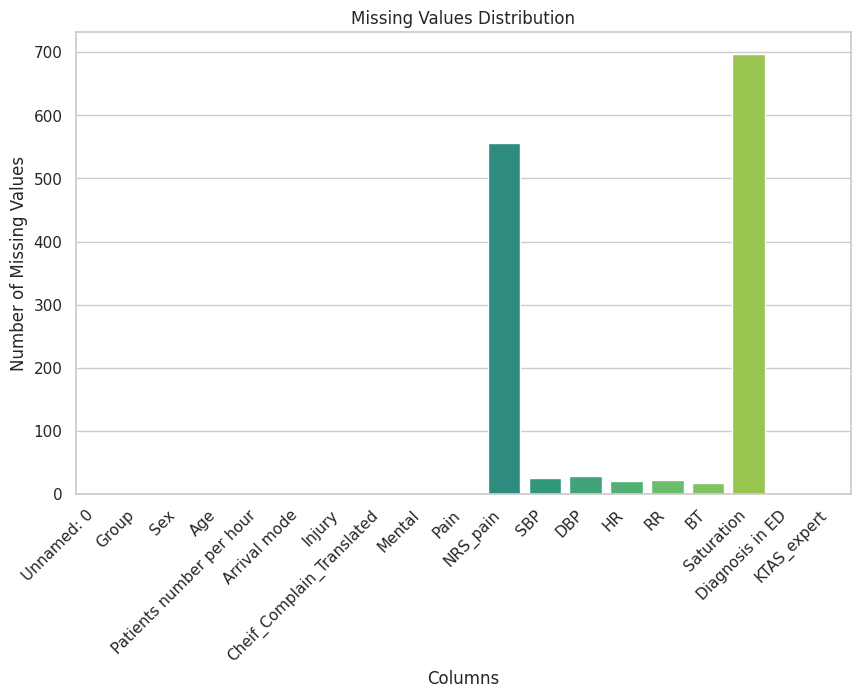

In [86]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your data is in a DataFrame named 'df'

# Check for missing values
missing_values = df.isnull().sum()

# Plot a bar chart to visualize missing values
plt.figure(figsize=(10, 6))
sns.barplot(x=missing_values.index, y=missing_values.values, palette='viridis')
plt.title('Missing Values Distribution')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.xticks(rotation=45, ha='right')
plt.show()

In [87]:
# initializing the dataframe
import  pandas as pd
df0 = pd.read_csv("501_project_dataset.tsv", sep='\t')  # Reading the data from 'data.tsv' into a pandas DataFrame

df = df0.copy(deep=True)  # Creating a deep copy of the DataFrame
df = df.iloc[:,1:]  # Removing the first column from the DataFrame
df.head()  # Displaying the first few rows of the DataFrame

,Group,Sex,Age,Patients number per hour,Arrival mode,Injury,Cheif_Complain_Translated,Mental,Pain,NRS_pain,SBP,DBP,HR,RR,BT,Saturation,Diagnosis in ED,KTAS_expert
0,2,2,71,3,3,2,right ocular pain,1,1,2.0,160.0,100.0,84.0,18.0,36.6,100.0,Corneal abrasion,4
1,1,1,56,12,3,2,right forearm burn,1,1,2.0,137.0,75.0,60.0,20.0,36.5,NaN,"Burn of hand, firts degree dorsum",5
2,2,1,68,8,2,2,"arm pain, Lt",1,1,2.0,130.0,80.0,102.0,20.0,36.6,98.0,"Fracture of surgical neck of humerus, closed",5
3,1,2,71,8,1,1,ascites tapping,1,1,3.0,139.0,94.0,88.0,20.0,36.5,NaN,Alcoholic liver cirrhosis with ascites,5
4,1,2,58,4,3,1,"Distension, Abd",1,1,3.0,91.0,67.0,93.0,18.0,36.5,NaN,Ascites,5


In [88]:
# Arrival modes '5' and '7' had very low occurrences (2 each)
# so those rows were dropped to reduce feature size
df = df[df['Arrival mode'] != 5]  # Dropping rows where 'Arrival mode' is equal to 5
df = df[df['Arrival mode'] != 7]  # Dropping rows where 'Arrival mode' is equal to 7

# Replacing NaN values in text features with empty strings
df['Diagnosis in ED'].replace(np.nan, '', inplace=True)  # Replacing NaN values in 'Diagnosis in ED' column with empty strings

df.isnull().sum()  # Checking the number of null values in each column of the DataFrame

# feature-target split
X, y = df.drop(columns=['KTAS_expert'], axis=1), df['KTAS_expert']  # Separating the features (X) and the target variable (y)

# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=30)  # Splitting the data into training and testing sets

# features where NaN values have to be replaed with 0
feat_impute_0 = ['NRS_pain']
# features where NaN values have to be replaed with mean
feat_impute_mean = ['SBP', 'DBP', 'HR', 'RR', 'BT', 'Saturation']
# features which have to be one-hot encoded
feat_onehot = ['Group', 'Sex', 'Arrival mode', 'Injury', 'Pain']
# rest of the features which only have to be normalized
feat_scale_rest = ['Age', 'Patients number per hour', 'Mental']

In [89]:
# Creating a SimpleImputer object with strategy as 'constant' and fill value as 0
simple_imputer_0 = SimpleImputer(strategy='constant', fill_value=0)
# Fitting the SimpleImputer on the selected features for imputation
simple_imputer_0.fit(X[feat_impute_0])
# Creating a StandardScaler object for normalizing the imputed values
standard_scaler_impute_0 = StandardScaler()
# Fitting the StandardScaler on the transformed imputed values
standard_scaler_impute_0.fit(simple_imputer_0.transform(X[feat_impute_0]))

# Creating a pipeline for imputation and normalization using the 0 imputer
pipe_impute_0 = Pipeline([
  ('imputer', simple_imputer_0),  # Imputing missing values with 0
  ('scaler', standard_scaler_impute_0)  # Normalizing the imputed values
])

# Creating a SimpleImputer object with default strategy (mean)
simple_imputer_mean = SimpleImputer()
# Fitting the SimpleImputer on the selected features for imputation
simple_imputer_mean.fit(X[feat_impute_mean])
# Creating a StandardScaler object for normalizing the imputed values
standard_scaler_impute_mean = StandardScaler()
# Fitting the StandardScaler on the transformed imputed values
standard_scaler_impute_mean.fit(simple_imputer_mean.transform(X[feat_impute_mean]))

# Creating a pipeline for imputation and normalization using the mean imputer
pipe_impute_mean = Pipeline([
  ('imputer', simple_imputer_mean),  # Imputing missing values with mean
  ('scaler', standard_scaler_impute_mean)  # Normalizing the imputed values
])

In [90]:
# CountVectorizer for Chief Complaint Translated
count_vectorizer_complain = CountVectorizer()
count_vectorizer_complain.fit(X['Cheif_Complain_Translated'])  # Fitting the CountVectorizer on the 'Cheif_Complain_Translated' column

# TruncatedSVD for Chief Complaint Translated
lsa_complain = TruncatedSVD(n_components=120)
lsa_complain.fit(count_vectorizer_complain.transform(X['Cheif_Complain_Translated']))  # Fitting the TruncatedSVD on the transformed data from CountVectorizer

# text feature vectorizer and decomposition pipeline
# Pipeline for Chief Complaint Translated
pipe_complain = Pipeline([
  ('cvec', count_vectorizer_complain),  # CountVectorizer step in the pipeline
  ('lsa', lsa_complain)  # TruncatedSVD step in the pipeline
])


# CountVectorizer for Diagnosis in ED
count_vectorizer_diagnosis = CountVectorizer()
count_vectorizer_diagnosis.fit(X['Diagnosis in ED'])  # Fitting the CountVectorizer on the 'Diagnosis in ED' column

# TruncatedSVD for Diagnosis in ED
lsa_diagnosis = TruncatedSVD(n_components=120)
lsa_diagnosis.fit(count_vectorizer_diagnosis.transform(X['Diagnosis in ED']))  # Fitting the TruncatedSVD on the transformed data from CountVectorizer

# text feature vectorizer and decomposition pipeline
# Pipeline for Diagnosis in ED
pipe_diagnosis = Pipeline([
  ('cvec', count_vectorizer_diagnosis),  # CountVectorizer step in the pipeline
  ('lsa', lsa_diagnosis)  # TruncatedSVD step in the pipeline
])

In [91]:
# one-hot encoder
one_hot_encoder =  OneHotEncoder(drop='first') # drop first to avoid dummy variable trap
one_hot_encoder.fit(X[feat_onehot]) # fit the one-hot encoder on the selected features

# standard normalizing saler
standard_scaler_rest = StandardScaler() # standard scaler for the rest of the features
standard_scaler_rest.fit(X[feat_scale_rest]) # fit the standard scaler on the selected features

# Column transformer to conatenate the various pipelines
pre_proc_cols = ColumnTransformer([
    ('impute_0', pipe_impute_0, feat_impute_0),
    ('impute_mean', pipe_impute_mean, feat_impute_mean),
    ('cv_complains', pipe_complain, 'Cheif_Complain_Translated'),
    ('cv_diagnosis', pipe_diagnosis, 'Diagnosis in ED'),
    ('one_hot', one_hot_encoder, feat_onehot),
    ('scale_rest', standard_scaler_rest, feat_scale_rest)
])

In [92]:
# Traige Accuracy metric.
def triage_accuracy(y, y_hat):
  tru = 0
  for tr, pr in zip(y, y_hat):
    # the accuracy window is tunable, currently set for maximizing surety in exchange for increased window size
    if (pr - tr < 1.6 and pr - tr >= 0) or (tr - pr < 1.2 and tr - pr >= 0):
      tru+=1
  return tru/len(y)

from sklearn.metrics import make_scorer # to make a custom scoring function
triage_score = make_scorer(triage_accuracy) # triage accuracy score for grid search

# helper function to map model's prediction to output class
def y_class(y):
  if y < 1.4:
    return 1
  elif y < 2.4:
    return 2
  elif y < 3.4:
    return 3
  elif y < 4.4:
    return 4
  else:
    return 5

In [93]:
# function to map model's prediction to output class
def triage_output(y_hat):
  y_out = [y_class(y) for y in y_hat] # map model's prediction to output class
  return np.array(y_out) # return the output class as a numpy array


# a pseudo precision-recall-f1 score metric
# Importing the required library
import collections


# Defining a function to calculate precision, recall, and F1-score for each class
def triage_precision_recall_f1(y, y_hat):

  # Counting the true labels
  true_count_by_label = collections.Counter(y)

  # Converting the model's predictions to output class labels
  y_out = triage_output(y_hat)

  # Counting the predicted labels
  pred_count_by_label = collections.Counter(y_out)

  # Initializing a dictionary to store the number of correct predictions for each label
  correct_by_label = {
      1:0, 2:0, 3:0, 4:0, 5:0
  }

  # Calculating the number of correct predictions for each label
  for tr, pr in zip(y, y_hat):
    if ( (tr + 0.6) > pr and (tr - 0.4) < pr ) :
      correct_by_label[tr] += 1
    elif ( (tr + 1.2) > pr and (tr - 0.8) < pr ) :
      correct_by_label[tr] += 0.4
    elif ( (tr + 1.5) > pr and (tr - 1) < pr ) :
      correct_by_label[tr] += 0.2
    elif ( pr > 5 and tr == 5 ):
      correct_by_label[5] += 1
    elif ( pr < 1 and tr == 1 ):
      correct_by_label[1] += 1

  precision = {}
  recall = {}
  f1 = {}

  # Calculating precision for each label
  for label in range(1, 6):
    if pred_count_by_label[label] != 0:
      precision[label] = correct_by_label[label] / pred_count_by_label[label]
    else:
      precision[label] = 0.0

  # Calculating recall for each label
  for label in range(1, 6):
    if true_count_by_label[label] != 0:
      recall[label] = correct_by_label[label] / true_count_by_label[label]
    else:
      recall[label] = 0.0

  # Calculating F1-score for each label
  for label in range(1, 6):
    if precision[label] + recall[label] != 0:
      f1[label] = (2 * precision[label] * recall[label]) / (precision[label] + recall[label])
    else:
      f1[label] = 0.0

  # Calculating the mean precision, recall, and F1-score
  mean_val = {
      'mean precision': np.array(list(precision.values())).mean(),
      'mean recall': np.array(list(recall.values())).mean(),
      'mean f1': np.array(list(f1.values())).mean(),
  }

  # Returning the precision, recall, F1-score, and mean values
  return [precision, recall,  f1, mean_val]


# to display the pipeline as a diagram
set_config(display="diagram")

In [94]:
# Defining a function to print various metrics
def print_metrics(prec_recall_f1):
  print('Classwise weak precision:')
  print(prec_recall_f1[0])
  print('Classwise weak recall:')
  print(prec_recall_f1[1])
  print('Classwise weak f1-score:')
  print(prec_recall_f1[2])
  print('Mean weak precision:')
  print(prec_recall_f1[3]['mean precision'])
  print('Mean weak recall:')
  print(prec_recall_f1[3]['mean recall'])
  print('Mean weak f1-score:')
  print(prec_recall_f1[3]['mean f1'])

# Defining a function to print grid search results
def print_grid(grid, X_test, y_test):
  print('Best Score:')
  print(grid.best_score_)
  print('Best Params:')
  print(grid.best_params_)
  print('Accuracy on test set:')
  print(triage_score(grid, X_test, y_test))


In [95]:
#------------------
# Training the pipeline using various regression methods.
# Linear Regression
# Importing the LinearRegression class from the sklearn.linear_model module
from sklearn.linear_model import LinearRegression

# Creating an instance of the LinearRegression class
lin = LinearRegression()

# Creating a pipeline with preprocessing steps and the LinearRegression classifier
pipe_lin = Pipeline([
  ('prep_proc', pre_proc_cols),  # Preprocessing step
  ('clf', lin)  # LinearRegression classifier
])

# Creating an empty dictionary for the parameters of grid search
lin_params = {}

# Creating a GridSearchCV object with the pipeline, parameters, and cross-validation
lin_grid = GridSearchCV(pipe_lin, lin_params, cv=10, scoring=triage_score)

# Fitting the GridSearchCV object to the training data
lin_grid.fit(X_train, y_train)

# Predicting the target variable using the fitted model
y_pred = lin_grid.predict(X_test)

# Printing the grid search results and evaluation metrics
print_grid(lin_grid, X_test, y_test)

# Calculating precision, recall, and F1-score
prec_recall_f1 = triage_precision_recall_f1(y_test, y_pred)

# Printing the evaluation metrics
print_metrics(prec_recall_f1)

pipe_lin

Best Score:
0.9490896358543417
Best Params:
{}
Accuracy on test set:
0.9592326139088729
Classwise weak precision:
{1: 0.5142857142857143, 2: 1.039024390243902, 3: 0.8322981366459634, 4: 0.5817204301075274, 5: 0.3454545454545455}
Classwise weak recall:
{1: 0.32727272727272727, 2: 0.6553846153846152, 3: 0.7976190476190483, 4: 0.7165562913907291, 5: 0.3454545454545455}
Classwise weak f1-score:
{1: 0.4, 2: 0.8037735849056601, 3: 0.8145896656534962, 4: 0.642136498516321, 5: 0.3454545454545455}
Mean weak precision:
0.6625566433475305
Mean weak recall:
0.5684574454243332
Mean weak f1-score:
0.6011908589060047


Pipeline(steps=[('prep_proc',
                 ColumnTransformer(transformers=[('impute_0',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value=0,
                                                                                 strategy='constant')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['NRS_pain']),
                                                 ('impute_mean',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['SBP', 'DBP', 'HR', 'RR',
                                                   'BT', 'Saturation']),
                                                 ('cv_complains',
                                                  Pipeline(...
                                                                   TruncatedSVD(n_components=120))]),
                                                  'Cheif_Complain_Translated'),
                                                 ('cv_diagnosis',
                                                  Pipeline(steps=[('cvec',
                                                                   CountVectorizer()),
                                                                  ('lsa',
                                                                   TruncatedSVD(n_components=120))]),
                                                  'Diagnosis in ED'),
                                                 ('one_hot',
                                                  OneHotEncoder(drop='first'),
                                                  ['Group', 'Sex',
                                                   'Arrival mode', 'Injury',
                                                   'Pain']),
                                                 ('scale_rest',
                                                  StandardScaler(),
                                                  ['Age',
                                                   'Patients number per hour',
                                                   'Mental'])])),
                ('clf', LinearRegression())])

In [96]:
# Ridge Regression
# Importing the Ridge class from the sklearn.linear_model module
from sklearn.linear_model import Ridge

# Creating an instance of the Ridge class
rig = Ridge()

# Creating a pipeline with preprocessing steps and the Ridge classifier
pipe_rig = Pipeline([
  ('prep_proc', pre_proc_cols),  # Preprocessing step
  ('clf', rig)  # Ridge classifier
])

# Creating an empty dictionary for the parameters of grid search
rig_params = {}

# Setting the alpha parameter values for Ridge regularization
rig_params['clf__alpha'] = [0.001, 0.01, 0.1, 1.0, 10]

# Creating an instance of GridSearchCV with the Ridge pipeline and parameters
rig_grid = GridSearchCV(pipe_rig, rig_params, cv=10, scoring=triage_score)

# Fitting the Ridge grid search on the training data
rig_grid.fit(X_train, y_train)

# Creating a DataFrame with the Ridge grid search results
rig_res = pd.DataFrame(rig_grid.cv_results_)[['param_clf__alpha', 'mean_test_score']]

# Saving the Ridge grid search results to a CSV file
rig_res.to_csv('ridge_params_vs_score.csv')

# Printing the grid search results and accuracy on the test set
print_grid(rig_grid, X_test, y_test)

# Predicting the target variable using the Ridge grid search model
y_pred = rig_grid.predict(X_test)

# Calculating precision, recall, and F1 score for the predicted values
prec_recall_f1 = triage_precision_recall_f1(y_test, y_pred)

# Printing the precision, recall, and F1 score metrics
print_metrics(prec_recall_f1)

Best Score:
0.9609103641456583
Best Params:
{'clf__alpha': 1.0}
Accuracy on test set:
0.9616306954436451
Classwise weak precision:
{1: 0.7333333333333334, 2: 1.2114285714285709, 3: 0.8451219512195127, 4: 0.5737373737373742, 5: 0.47142857142857153}
Classwise weak recall:
{1: 0.4, 2: 0.6523076923076919, 3: 0.8250000000000005, 4: 0.7523178807947026, 5: 0.30000000000000004}
Classwise weak f1-score:
{1: 0.5176470588235296, 2: 0.8479999999999995, 3: 0.8349397590361449, 4: 0.6510028653295135, 5: 0.36666666666666675}
Mean weak precision:
0.7670099602294725
Mean weak recall:
0.5859251146204791
Mean weak f1-score:
0.6436512699711708


In [97]:
# Lasso Regression
# Importing the Lasso class from the sklearn.linear_model module
from sklearn.linear_model import Lasso

# Creating an instance of the Lasso class
las = Lasso()

# Creating a pipeline with preprocessing steps and the Lasso classifier
pipe_las = Pipeline([
  ('prep_proc', pre_proc_cols),  # Preprocessing step
  ('clf', las)  # Lasso classifier
])

# Creating an empty dictionary for the parameters of grid search
las_params = {}

# Setting the alpha parameter values for Lasso regularization
las_params['clf__alpha'] = [0.001, 0.01, 0.1, 1.0, 10]

# Creating a GridSearchCV object with the pipeline, parameters, and 10-fold cross-validation
las_grid = GridSearchCV(pipe_las, las_params, cv=10, scoring=triage_score)

# Fitting the GridSearchCV object to the training data
las_grid.fit(X_train, y_train)

# Creating a DataFrame with the Lasso grid search results
las_res = pd.DataFrame(las_grid.cv_results_)[['param_clf__alpha', 'mean_test_score']]

# Saving the Lasso grid search results to a CSV file
las_res.to_csv('lasso_params_vs_score.csv')

# Printing the evaluation metrics for the Lasso grid search
print_grid(las_grid, X_test, y_test)

# Predicting the target variable using the Lasso grid search model
y_pred = las_grid.predict(X_test)

# Calculating the precision, recall, and F1-score for the Lasso predictions
prec_recall_f1 = triage_precision_recall_f1(y_test, y_pred)

# Printing the evaluation metrics for the Lasso predictions
print_metrics(prec_recall_f1)

Best Score:
0.9585854341736694
Best Params:
{'clf__alpha': 0.001}
Accuracy on test set:
0.9640287769784173
Classwise weak precision:
{1: 0.7142857142857144, 2: 1.3225806451612894, 3: 0.8320000000000006, 4: 0.5784615384615391, 5: 0.5333333333333334}
Classwise weak recall:
{1: 0.45454545454545464, 2: 0.6307692307692303, 3: 0.8666666666666674, 4: 0.7470198675496696, 5: 0.21818181818181823}
Classwise weak f1-score:
{1: 0.5555555555555557, 2: 0.8541666666666661, 3: 0.8489795918367353, 4: 0.652023121387284, 5: 0.3096774193548387}
Mean weak precision:
0.7961322462483753
Mean weak recall:
0.583436607542568
Mean weak f1-score:
0.644080470960216


In [98]:
# Stochastic Gradient Descent (SGD) Classifier
# Importing the SGDClassifier class from the sklearn.linear_model module
from sklearn.linear_model import SGDClassifier

# Creating an instance of the SGDClassifier class with max_iter set to 20000
sgd = SGDClassifier(max_iter=20000)

# Creating a pipeline with preprocessing steps and the SGDClassifier
pipe_sgd = Pipeline([
  ('prep_proc', pre_proc_cols),  # Preprocessing step
  ('clf', sgd)  # SGDClassifier
])

# Creating an empty dictionary for the parameters of grid search
sgd_params = {}

# Creating a GridSearchCV object with the pipeline, parameters, and 10-fold cross-validation
sgd_grid = GridSearchCV(pipe_sgd, sgd_params, cv=10, scoring=triage_score)

# Fitting the grid search on the training data
sgd_grid.fit(X_train, y_train)

# Printing the grid search results on the test data
print_grid(sgd_grid, X_test, y_test)

# Predicting the target variable on the test data using the best estimator from grid search
y_pred = sgd_grid.predict(X_test)

# Calculating precision, recall, and F1-score using the predicted and actual target values
prec_recall_f1 = triage_precision_recall_f1(y_test, y_pred)

# Printing the evaluation metrics
print_metrics(prec_recall_f1)

Best Score:
0.9338095238095236
Best Params:
{}
Accuracy on test set:
0.9160671462829736
Classwise weak precision:
{1: 0.6444444444444444, 2: 0.7061224489795915, 3: 0.6730538922155694, 4: 0.5848837209302326, 5: 0.25}
Classwise weak recall:
{1: 0.5272727272727272, 2: 0.5323076923076921, 3: 0.6690476190476196, 4: 0.6662251655629139, 5: 0.22727272727272727}
Classwise weak f1-score:
{1: 0.5799999999999998, 2: 0.6070175438596488, 3: 0.6710447761194035, 4: 0.6229102167182663, 5: 0.23809523809523808}
Mean weak precision:
0.5717009013139676
Mean weak recall:
0.5244251862927359
Mean weak f1-score:
0.5438135549585112


In [99]:
# Support Vector Regression (SVR)
# Importing the SVR class from the sklearn.svm module
from sklearn.svm import SVR

# Creating an instance of the SVR class
svr = SVR()

# Creating a pipeline with preprocessing steps and the SVR classifier
pipe_svr = Pipeline([
  ('prep_proc', pre_proc_cols),  # Preprocessing step
  ('clf', svr)  # SVR classifier
])

# Defining the parameters for grid search
svr_params = {}
svr_params['clf__kernel'] = ['poly', 'rbf', 'sigmoid']  # Different kernel functions
svr_params['clf__C'] = [0.01, 0.1, 1.0, 10, 100]  # Different values for the regularization parameter C

# Creating a grid search object with the pipeline and parameters
svr_grid = GridSearchCV(pipe_svr, svr_params, cv=10, scoring=triage_score)

# Fitting the grid search object to the training data
svr_grid.fit(X_train, y_train)

# Creating a DataFrame with the grid search results
svr_res = pd.DataFrame(svr_grid.cv_results_)[['param_clf__C', 'param_clf__kernel', 'mean_test_score']]

# Saving the grid search results to a CSV file
svr_res.to_csv('SVR_params_vs_score.csv')

# Printing the grid search results
print_grid(svr_grid, X_test, y_test)

# Predicting the target variable using the trained model
y_pred = svr_grid.predict(X_test)

# Calculating precision, recall, and F1 score
prec_recall_f1 = triage_precision_recall_f1(y_test, y_pred)

# Printing the evaluation metrics
print_metrics(prec_recall_f1)

Best Score:
0.9503641456582631
Best Params:
{'clf__C': 1.0, 'clf__kernel': 'rbf'}
Accuracy on test set:
0.9496402877697842
Classwise weak precision:
{1: 1.9000000000000001, 2: 1.5066666666666662, 3: 0.7283582089552243, 4: 0.6218579234972682, 5: 2.8}
Classwise weak recall:
{1: 0.34545454545454546, 2: 0.695384615384615, 3: 0.871428571428572, 4: 0.7536423841059608, 5: 0.12727272727272726}
Classwise weak f1-score:
{1: 0.5846153846153845, 2: 0.9515789473684207, 3: 0.7934959349593502, 4: 0.6814371257485035, 5: 0.2434782608695652}
Mean weak precision:
1.5113765598238318
Mean weak recall:
0.5586365687292842
Mean weak f1-score:
0.6509211307122449


In [100]:
# K-Nearest Neighbors Regressor (KNN)
# Importing the KNeighborsRegressor class from the sklearn.neighbors module
from sklearn.neighbors import KNeighborsRegressor

# Creating an instance of KNeighborsRegressor
knn = KNeighborsRegressor()

# Creating a pipeline with pre_proc_cols preprocessing steps and knn as the regressor
pipe_knn = Pipeline([
  ('prep_proc', pre_proc_cols),
  ('clf', knn)
])

# Defining an empty dictionary for knn_params
knn_params = {}

# Setting the 'n_neighbors' parameter values for KNeighborsRegressor
knn_params['clf__n_neighbors'] = [3, 5, 7]

# Setting the 'weights' parameter values for KNeighborsRegressor
knn_params['clf__weights'] = ['uniform', 'distance']

# Creating a grid search object with the pipeline and parameters
knn_grid = GridSearchCV(pipe_knn, knn_params, cv=10, scoring=triage_score)

# Fitting the grid search object to the training data
knn_grid.fit(X_train, y_train)

# Creating a DataFrame with the grid search results
knn_res = pd.DataFrame(knn_grid.cv_results_)[['param_clf__n_neighbors', 'param_clf__weights', 'mean_test_score']]

# Saving the grid search results to a CSV file
knn_res.to_csv('knn_params_vs_score.csv')

# Printing the grid search results
print_grid(knn_grid, X_test, y_test)

# Predicting the target variable using the trained model
y_pred = knn_grid.predict(X_test)

# Calculating precision, recall, and F1 score
prec_recall_f1 = triage_precision_recall_f1(y_test, y_pred)

# Printing the evaluation metrics
print_metrics(prec_recall_f1)

Best Score:
0.9373109243697479
Best Params:
{'clf__n_neighbors': 7, 'clf__weights': 'uniform'}
Accuracy on test set:
0.9448441247002398
Classwise weak precision:
{1: 1.35, 2: 2.0705882352941174, 3: 0.9390728476821198, 4: 0.40655737704918077, 5: 0.6000000000000001}
Classwise weak recall:
{1: 0.49090909090909096, 2: 0.5415384615384615, 3: 0.8440476190476196, 4: 0.6569536423841066, 5: 0.02727272727272728}
Classwise weak f1-score:
{1: 0.7200000000000001, 2: 0.8585365853658535, 3: 0.8890282131661448, 4: 0.5022784810126588, 5: 0.05217391304347827}
Mean weak precision:
1.0732436920050836
Mean weak recall:
0.5121443082304011
Mean weak f1-score:
0.6044034385176272


In [101]:
# Partial Least Squares Regression (PLS)
# Importing the PLSRegression class from the sklearn.cross_decomposition module
from sklearn.cross_decomposition import PLSRegression

# Creating an instance of PLSRegression
pls = PLSRegression()

# Creating a pipeline with pre_proc_cols preprocessing steps and pls as the regressor
pipe_pls = Pipeline([
  ('prep_proc', pre_proc_cols),
  ('clf', pls)
])

# Defining an empty dictionary for pls_params
pls_params = {}

# Setting the 'n_components' parameter values for PLSRegression
pls_params['clf__n_components'] = [1, 2, 5, 10, 15]

# Creating a GridSearchCV object with pipe_pls as the estimator, pls_params as the parameter grid,
# 10-fold cross-validation, and triage_score as the scoring metric
pls_grid = GridSearchCV(pipe_pls, pls_params, cv=10, scoring=triage_score)

# Fitting the PLSRegression model to the training data
pls_grid.fit(X_train, y_train)

# Printing the grid search results for PLSRegression on the test data
print_grid(pls_grid, X_test, y_test)

# Predicting the target variable using the fitted PLSRegression model on the test data
y_pred = pls_grid.predict(X_test)

# Calculating precision, recall, and F1-score for the predicted values
prec_recall_f1 = triage_precision_recall_f1(y_test, y_pred)

# Printing the evaluation metrics (precision, recall, and F1-score)
print_metrics(prec_recall_f1)

Best Score:
0.9550000000000001
Best Params:
{'clf__n_components': 5}
Accuracy on test set:
0.9640287769784173
Classwise weak precision:
{1: 0.6333333333333334, 2: 1.2228571428571424, 3: 0.7486338797814214, 4: 0.6093023255813961, 5: 0.28571428571428575}
Classwise weak recall:
{1: 0.34545454545454546, 2: 0.6584615384615382, 3: 0.8154761904761911, 4: 0.6940397350993386, 5: 0.27272727272727276}
Classwise weak f1-score:
{1: 0.4470588235294118, 2: 0.8559999999999998, 3: 0.7806267806267813, 4: 0.6489164086687315, 5: 0.2790697674418605}
Mean weak precision:
0.6999681934535158
Mean weak recall:
0.5572318564437773
Mean weak f1-score:
0.602334356053357


In [102]:
# Bayesian Ridge Regression
# Importing the BayesianRidge class from the sklearn.linear_model module
from sklearn.linear_model import BayesianRidge

# Creating an instance of BayesianRidge
brg = BayesianRidge()

# Creating a pipeline with pre_proc_cols preprocessing steps and brg as the regressor
pipe_brg = Pipeline([
  ('prep_proc', pre_proc_cols),
  ('clf', brg)
])

# Defining an empty dictionary for brg_params
brg_params = {}

# Creating a GridSearchCV object with pipe_brg as the estimator, brg_params as the parameter grid,
# 10-fold cross-validation, and triage_score as the scoring metric
brg_grid = GridSearchCV(pipe_brg, brg_params, cv=10, scoring=triage_score)

# Fitting the brg_grid object to the training data X_train and y_train
brg_grid.fit(X_train, y_train)

# Printing the grid search results using the print_grid function for the brg_grid object and the test data X_test and y_test
print_grid(brg_grid, X_test, y_test)

# Predicting the target variable y_pred using the brg_grid object and the test data X_test
y_pred = brg_grid.predict(X_test)

# Calculating precision, recall, and F1 score using the triage_precision_recall_f1 function for the y_test and y_pred
prec_recall_f1 = triage_precision_recall_f1(y_test, y_pred)

# Printing the evaluation metrics using the print_metrics function for the prec_recall_f1 values
print_metrics(prec_recall_f1)

Best Score:
0.9585714285714285
Best Params:
{}
Accuracy on test set:
0.9640287769784173
Classwise weak precision:
{1: 0.7999999999999999, 2: 1.6239999999999992, 3: 0.8055248618784534, 4: 0.5408866995073897, 5: 3.4}
Classwise weak recall:
{1: 0.509090909090909, 2: 0.6246153846153844, 3: 0.8678571428571432, 4: 0.7271523178807955, 5: 0.15454545454545454}
Classwise weak f1-score:
{1: 0.6222222222222221, 2: 0.9022222222222219, 3: 0.8355300859598858, 4: 0.6203389830508481, 5: 0.29565217391304344}
Mean weak precision:
1.4340823122771684
Mean weak recall:
0.5766522417979372
Mean weak f1-score:
0.6551931374736443


In [103]:
# Decision Tree Regressor
# Importing the DecisionTreeRegressor class from the sklearn.tree module
from sklearn.tree import DecisionTreeRegressor

# Creating an instance of DecisionTreeRegressor
dtr = DecisionTreeRegressor()

# Creating a pipeline with pre_proc_cols preprocessing steps and dtr as the regressor
pipe_dtr = Pipeline([
  ('prep_proc', pre_proc_cols),
  ('clf', dtr)
])

# Defining the parameters for grid search
dtr_params = {}
dtr_params['clf__criterion'] = ['squared_error', 'friedman_mse']
dtr_params['clf__splitter'] = ['best', 'random']

# Creating a GridSearchCV object with pipe_dtr, dtr_params, cv=10, and scoring=triage_score
dtr_grid = GridSearchCV(pipe_dtr, dtr_params, cv=10, scoring=triage_score)

# Fitting the grid search on X_train and y_train
dtr_grid.fit(X_train, y_train)

# Creating a DataFrame with the grid search results for 'param_clf__splitter', 'param_clf__criterion', and 'mean_test_score'
dtr_res = pd.DataFrame(dtr_grid.cv_results_)[['param_clf__splitter', 'param_clf__criterion', 'mean_test_score']]

# Saving the DataFrame as a CSV file named 'dtr_params_vs_score.csv'
dtr_res.to_csv('dtr_params_vs_score.csv')

# Printing the grid search results using the print_grid function on X_test and y_test
print_grid(dtr_grid, X_test, y_test)

# Predicting the target variable using the fitted grid search model on X_test
y_pred = dtr_grid.predict(X_test)

# Calculating precision, recall, and F1 score using triage_precision_recall_f1 function on y_test and y_pred
prec_recall_f1 = triage_precision_recall_f1(y_test, y_pred)

# Printing the evaluation metrics using the print_metrics function on prec_recall_f1
print_metrics(prec_recall_f1)

Best Score:
0.9126190476190477
Best Params:
{'clf__criterion': 'friedman_mse', 'clf__splitter': 'random'}
Accuracy on test set:
0.9016786570743405
Classwise weak precision:
{1: 0.6888888888888889, 2: 0.5485714285714284, 3: 0.7042944785276077, 4: 0.6236842105263158, 5: 0.2608695652173913}
Classwise weak recall:
{1: 0.5636363636363636, 2: 0.5907692307692305, 3: 0.6833333333333338, 4: 0.6278145695364239, 5: 0.2727272727272727}
Classwise weak f1-score:
{1: 0.6199999999999999, 2: 0.5688888888888887, 3: 0.6936555891238675, 4: 0.6257425742574259, 5: 0.2666666666666666}
Mean weak precision:
0.5652617143463263
Mean weak recall:
0.5476561540005249
Mean weak f1-score:
0.5549907437873698


In [104]:
# Random Forest Regressor
# Importing the RandomForestRegressor class from the sklearn.ensemble module
from sklearn.ensemble import RandomForestRegressor

# Creating an instance of RandomForestRegressor
rft = RandomForestRegressor()

# Creating a pipeline with pre_proc_cols preprocessing steps and rft as the regressor
pipe_rft = Pipeline([
  ('prep_proc', pre_proc_cols),
  ('clf', rft)
])

# Defining the parameters for grid search
rft_params = {}
rft_params['clf__n_estimators'] = [20, 50, 80, 100, 150, 200]
rft_params['clf__max_depth'] = [None, 3, 10, 20, 30]

# Creating an instance of GridSearchCV with pipe_rft, rft_params, cv=10, and scoring=triage_score
rft_grid = GridSearchCV(pipe_rft, rft_params, cv=10, scoring=triage_score)

# Fitting the rft_grid on X_train and y_train
rft_grid.fit(X_train, y_train)

# Creating a DataFrame with the results of the grid search
rft_res = pd.DataFrame(rft_grid.cv_results_)[['param_clf__n_estimators',
                                              'param_clf__max_depth',
                                              'mean_test_score']]

# Saving the DataFrame to a CSV file
rft_res.to_csv('rft_params_vs_score.csv')

# Printing the grid search results
print_grid(rft_grid, X_test, y_test)

# Predicting the target variable using the trained model
y_pred = rft_grid.predict(X_test)

# Calculating precision, recall, and F1 score using triage_precision_recall_f1 function on y_test and y_pred
prec_recall_f1 = triage_precision_recall_f1(y_test, y_pred)

# Printing the evaluation metrics using the print_metrics function on prec_recall_f1
print_metrics(prec_recall_f1)

Best Score:
0.9527170868347339
Best Params:
{'clf__max_depth': 30, 'clf__n_estimators': 200}
Accuracy on test set:
0.9592326139088729
Classwise weak precision:
{1: 1.05, 2: 1.2333333333333327, 3: 0.8021978021978027, 4: 0.5462686567164184, 5: 0.0}
Classwise weak recall:
{1: 0.38181818181818183, 2: 0.5692307692307689, 3: 0.8690476190476195, 4: 0.7271523178807954, 5: 0.05454545454545456}
Classwise weak f1-score:
{1: 0.56, 2: 0.7789473684210523, 3: 0.8342857142857149, 4: 0.623863636363637, 5: 0.0}
Mean weak precision:
0.7263599584495107
Mean weak recall:
0.520358868504564
Mean weak f1-score:
0.5594193438140809


In [105]:
# AdaBoost Regressor
# Importing the AdaBoostRegressor class from the sklearn.ensemble module
from sklearn.ensemble import AdaBoostRegressor
# Importing the DecisionTreeRegressor class from the sklearn.tree module
from sklearn.tree import DecisionTreeRegressor  # for base estimator

# Creating an instance of AdaBoostRegressor
ada = AdaBoostRegressor()

# Creating a pipeline with pre_proc_cols preprocessing steps and ada as the regressor
pipe_ada = Pipeline([
  ('prep_proc', pre_proc_cols),
  ('clf', ada)
])

# Defining the parameters for grid search
ada_params = {}
ada_params['clf__n_estimators'] = [50, 100, 150, 200]
ada_params['clf__base_estimator'] = [DecisionTreeRegressor(max_depth=3),
                                     DecisionTreeRegressor(max_depth=10),
                                     DecisionTreeRegressor(max_depth=20)]

# Creating an instance of GridSearchCV with pipe_ada, ada_params, cv=10, and scoring=triage_score
ada_grid = GridSearchCV(pipe_ada, ada_params, cv=10, scoring=triage_score)
# Fitting the GridSearchCV object to X_train and y_train
ada_grid.fit(X_train, y_train)

# Creating a DataFrame from ada_grid.cv_results_ with selected columns and saving it to a CSV file
ada_res = pd.DataFrame(ada_grid.cv_results_)[['param_clf__n_estimators',
                                              'param_clf__base_estimator',
                                              'mean_test_score']]
ada_res.to_csv('ada_params_vs_score.csv')

# Printing the grid search results using the print_grid function
print_grid(ada_grid, X_test, y_test)

# Predicting the target variable using ada_grid and X_test
y_pred = ada_grid.predict(X_test)

# Calculating precision, recall, and F1 score using triage_precision_recall_f1 function
prec_recall_f1 = triage_precision_recall_f1(y_test, y_pred)
# Printing the metrics using the print_metrics function
print_metrics(prec_recall_f1)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/en

Best Score:
0.9621708683473388
Best Params:
{'clf__base_estimator': DecisionTreeRegressor(max_depth=10), 'clf__n_estimators': 200}
Accuracy on test set:
0.9688249400479616
Classwise weak precision:
{1: 1.1, 2: 1.1515151515151507, 3: 0.7770491803278693, 4: 0.5835051546391757, 5: 0.39999999999999997}
Classwise weak recall:
{1: 0.4, 2: 0.5846153846153842, 3: 0.8464285714285719, 4: 0.7496688741721861, 5: 0.05454545454545454}
Classwise weak f1-score:
{1: 0.5866666666666668, 2: 0.7755102040816322, 3: 0.8102564102564107, 4: 0.6562318840579715, 5: 0.096}
Mean weak precision:
0.8024138972964392
Mean weak recall:
0.5270516569523194
Mean weak f1-score:
0.5849330330125364


In [106]:
# Gradient Boosting Regressor
# Importing the GradientBoostingRegressor class from the sklearn.ensemble module
from sklearn.ensemble import GradientBoostingRegressor

# Creating an instance of GradientBoostingRegressor
gdb = GradientBoostingRegressor()

# Creating a pipeline with pre_proc_cols preprocessing steps and gdb as the regressor
pipe_gdb = Pipeline([
  ('prep_proc', pre_proc_cols),
  ('clf', gdb)
])

# Defining the parameters for grid search
gdb_params = {}
gdb_params['clf__learning_rate'] = [0.01, 0.1, 1]
gdb_params['clf__n_estimators'] = [50, 100, 150, 200]

# Creating a GridSearchCV object with pipe_gdb as the estimator, gdb_params as the parameter grid,
# cv=10 for 10-fold cross-validation, and triage_score as the scoring metric
gdb_grid = GridSearchCV(pipe_gdb, gdb_params, cv=10, scoring=triage_score)
gdb_grid.fit(X_train, y_train)

# Creating a DataFrame with the grid search results
gdb_res = pd.DataFrame(gdb_grid.cv_results_)[['param_clf__n_estimators',
                                              'param_clf__learning_rate',
                                              'mean_test_score']]
gdb_res.to_csv('gdb_params_vs_score.csv')

# Printing the grid search results
print_grid(gdb_grid, X_test, y_test)

# Predicting the target variable using the best estimator from grid search
y_pred = gdb_grid.predict(X_test)

# Calculating precision, recall, and F1 score
prec_recall_f1 = triage_precision_recall_f1(y_test, y_pred)

# Printing the evaluation metrics
print_metrics(prec_recall_f1)

Best Score:
0.9645238095238096
Best Params:
{'clf__learning_rate': 0.1, 'clf__n_estimators': 100}
Accuracy on test set:
0.9616306954436451
Classwise weak precision:
{1: 1.1, 2: 1.754545454545453, 3: 0.7877551020408167, 4: 0.5906735751295342, 5: 1.3}
Classwise weak recall:
{1: 0.4, 2: 0.5938461538461534, 3: 0.9190476190476194, 4: 0.7549668874172193, 5: 0.11818181818181818}
Classwise weak f1-score:
{1: 0.5866666666666668, 2: 0.8873563218390798, 3: 0.8483516483516487, 4: 0.6627906976744192, 5: 0.21666666666666665}
Mean weak precision:
1.1065948263431609
Mean weak recall:
0.5572084956985621
Mean weak f1-score:
0.6403664002396963


In [107]:
# Multi-layer Perceptron Regressor (MLP)
# Importing the MLPRegressor class from the sklearn.neural_network module
from sklearn.neural_network import MLPRegressor

# Creating an instance of MLPRegressor with max_iter=1000
mlp = MLPRegressor(max_iter=1000)

# Creating a pipeline with pre_proc_cols preprocessing steps and mlp as the classifier
pipe_mlp = Pipeline([
  ('prep_proc', pre_proc_cols),
  ('clf', mlp)
])

# Defining the parameters for grid search
mlp_params = {}
mlp_params['clf__hidden_layer_sizes'] = [(10,10), (20,20), (20,10,10)]

# Creating a GridSearchCV object with pipe_mlp as the estimator, mlp_params as the parameter grid,
# cv=10 for 10-fold cross-validation, and triage_score as the scoring metric
mlp_grid = GridSearchCV(pipe_mlp, mlp_params, cv=10, scoring=triage_score)

# Fitting the grid search object to the training data
mlp_grid.fit(X_train, y_train)

# Creating a DataFrame with the grid search results for hidden_layer_sizes and mean_test_score
mlp_res = pd.DataFrame(mlp_grid.cv_results_)[['param_clf__hidden_layer_sizes', 'mean_test_score']]

# Saving the DataFrame as a CSV file
mlp_res.to_csv('mlp_params_vs_score.csv')

# Printing the grid search results for the best estimator, X_test, and y_test
print_grid(mlp_grid, X_test, y_test)

# Predicting the target variable for X_test using the best estimator from the grid search
y_pred = mlp_grid.predict(X_test)

# Calculating precision, recall, and F1 score for y_test and y_pred
prec_recall_f1 = triage_precision_recall_f1(y_test, y_pred)

# Printing the precision, recall, and F1 score metrics
print_metrics(prec_recall_f1)

Best Score:
0.9195658263305322
Best Params:
{'clf__hidden_layer_sizes': (10, 10)}
Accuracy on test set:
0.9064748201438849
Classwise weak precision:
{1: 0.5714285714285714, 2: 0.7547169811320752, 3: 0.7408805031446549, 4: 0.6327044025157238, 5: 0.1897435897435898}
Classwise weak recall:
{1: 0.36363636363636365, 2: 0.6153846153846152, 3: 0.7011904761904769, 4: 0.6662251655629144, 5: 0.3363636363636365}
Classwise weak f1-score:
{1: 0.4444444444444444, 2: 0.6779661016949151, 3: 0.7204892966360864, 4: 0.6490322580645167, 5: 0.24262295081967222}
Mean weak precision:
0.577894809592923
Mean weak recall:
0.5365600514276013
Mean weak f1-score:
0.5469110103319269
